<h2 style="border: 0; border-radius: 15px; font-weight: bold; font-size: 220%; color: brown; text-align: center;">Auto Scout EDA Project Part 2</h2>

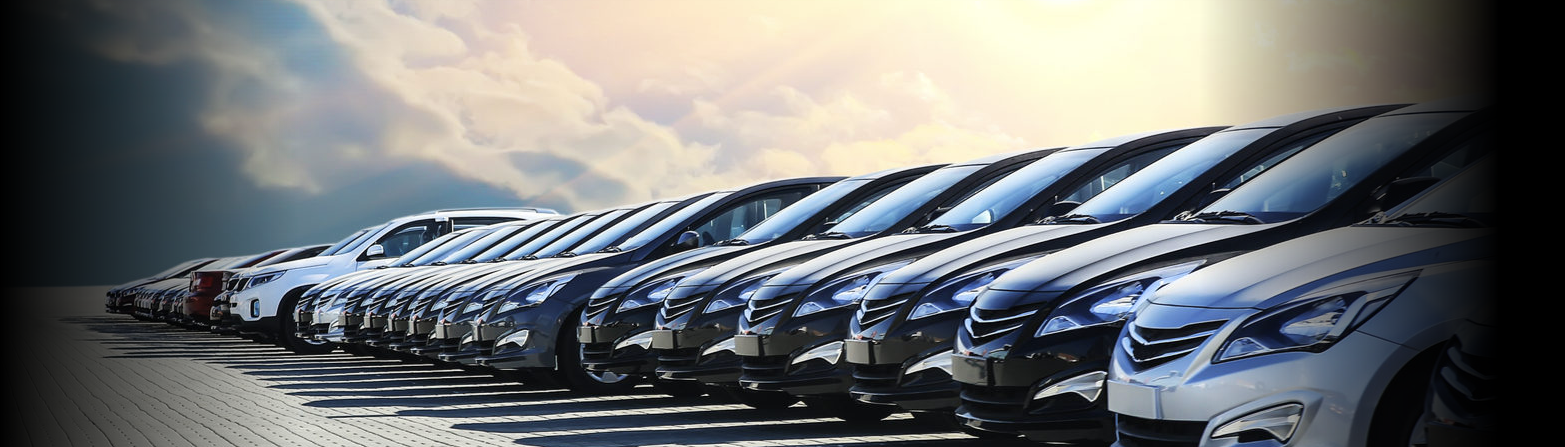

<div style="background-color: #E6F2FF; padding: 10px;">
    <h2 style="border: 0; border-radius: 15px; font-weight: bold; font-size: 220%; color: brown; text-align: center;">Content</h2>
    <ul style="list-style-type: disc; color: white;">
        <li><a href="#1">DATA SUMMARY</a></li>
        <li><a href="#2">GEARBOX</a></li>
        <li><a href="#3">FUEL_TYPE</a></li>
        <li><a href="#4">POWER</a></li>
        <li><a href="#5">ENGINE_SIZE</a></li>
        <li><a href="#6">DOORS</a></li>
        <li><a href="#32">FIRST_REGISTRATION</a></li>
        <li><a href="#7">GEARS</a></li>
        <li><a href="#8">MILEAGE</a></li>
        <li><a href="#9">PREVIOUS OWNER</a></li> 
        <li><a href="#10">FULL SERVICE HISTORY</a></li>
        <li><a href="#11">GENERAL INSPECTION</a></li>
        <li><a href="#12">FUEL CONSUMPTION</a></li>            
        <li><a href="#13">MAKE MODEL and MODEL</a></li>
        <li><a href="#14">COLOUR</a></li>
        <li><a href="#15">PAINT</a></li>
        <li><a href="#16">DRIVE TRAIN</a></li>
        <li><a href="#17">MANUFACTURER_COLOUR</a></li>
        <li><a href="#18">COUNTRY VERSION</a></li>
        <li><a href="#20">SELLER</a></li>
        <li><a href="#21">SEATS</a></li>
        <li><a href="#22">EMPTY WEIGHT</a></li>
        <li><a href="#23">COMFORT_&_CONVENIENCE</a></li>
        <li><a href="#24">ENTERTAINMENT_&_MEDIA</a></li>
        <li><a href="#25">SAFETY_&_SECURITY</a></li>
        <li><a href="#26">EXTRAS</a></li>                       
        <li><a href="#27">UPHOLSTERY</a></li>
        <li><a href="#28">UPHOLSTERY COLOUR</a></li>
        <li><a href="#29">Co EMISSION</a></li>
        <li><a href="#30">WARRANTY</a></li>
        <li><a href="#31">EMISSION_CLASS</a></li>
        <li><a href="#37">CYLINDER</a></li>
        <li><a href="#34">EVALUATION</a></li>
    </ul>
</div>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import clean_columns
import re
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [2]:
df0 = pd.read_csv("as24_cars_part_1.csv") 
df = df0.copy()

## <p style="background-color:#Green; font-family:newtimeroman; color:Orange; font-size:175%; text-align:left; border-radius:10px 10px;">Data Summary</p>
<a id="1"></a>


- **make_model**: Vehicle brand and model.
- **short_description**: Brief description.
- **make**: Vehicle brand.
- **model**: Vehicle model.
- **location**: Location of the vehicle.
- **price**: Price.
- **body_type**: Vehicle body type.
- **type**: Vehicle type.
- **doors**: Number of doors in the vehicle.
- **country_version**: Country version of the vehicle.
- **offer_number**: Offer number.
- **warranty**: Warranty.
- **mileage**: Vehicle mileage information.
- **first_registration**: First registration date.
- **gearbox**: Gearbox type.
- **fuel_type**: Fuel type.
- **colour**: Vehicle color.
- **paint**: Paint type.
- **desc**: Description.
- **seller**: Seller.
- **seats**: Number of seats in the vehicle.
- **power**: Engine power.
- **engine_size**: Engine size.
- **gears**: Number of gears.
- **co_emissions**:  CO₂ emissions.
- **manufacturer_colour**: Manufacturer color.
- **drivetrain**: Drivetrain type.
- **cylinders**: Number of cylinders.
- **fuel_consumption**: Fuel consumption.
- **comfort_&_convenience**: Comfort and convenience features.
- **entertainment_&_media**: Entertainment and media features.
- **safety_&_security**: Safety and security features.
- **extras**: Extra features.
- **empty_weight**: Empty weight.
- **model_code**: Model code.
- **general_inspection**: General inspection.
- **last_service**: Last service.
- **full_service_history**: Full service history.
- **non_smoker_vehicle**: Non-smoker vehicle.
- **emission_class**: Emission class.
- **emissions_sticker**: Emissions sticker.
- **upholstery_colour**: Upholstery color.
- **upholstery**: Upholstery.
- **production_date**: Production date.
- **previous_owner**: Previous owner.
- **other_fuel_types**: Other fuel types.
- **power_consumption**: Power consumption.
- **energy_efficiency_class**: Energy efficiency class.
- **co_efficiency**:  CO₂ efficiency.
- **fuel_consumption_wltp**: WLTP fuel consumption.
- **co_emissions_wltp**: WLTP  CO₂ emissions.
- **available_from**: Available from.
- **taxi_or_rental_car**: Taxi or rental car.
- **availability**: Availability status.
- **last_timing_belt_change**: Last timing belt change.
- **electric_range_wltp**: WLTP electric range.
- **power_consumption_wltp**: WLTP power consumption.
- **battery_ownership**: Battery ownership.

In [3]:
# user-defined function for counting missing values
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

In [4]:
# first_looking
def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [5]:
# user defined function for missing values

def handle_missing_values(df, column):
    # Count the number of missing values in the column
    missing_count = df[column].isnull().sum()
    
    # Calculate the percentage of missing values
    missing_percentage = (missing_count / len(df)) * 100
    
    # Print the results
    print("Missing Values in '{}':".format(column))
    print("Count: {}".format(missing_count))
    print("Percentage: {:.2f}%".format(missing_percentage))

In [6]:
def column_summary(x):
    print("-"*25)
    print("Total Value Counts :", x.value_counts(dropna= False))
    print("-"*25)
    print("Total NaN values :", x.isnull().sum())
    

In [7]:
missing_values(df)

,Missing_Number,Missing_Percent
general_inspection,22259,77.747118
co_efficiency,20826,72.741879
energy_efficiency_class,20826,72.741879
model_code,20263,70.775410
emissions_sticker,19216,67.118407
non_smoker_vehicle,17036,59.504017
full_service_history,16065,56.112469
previous_owner,14615,51.047852
paint,14135,49.371289
upholstery_colour,14061,49.112819


## <p style="background-color:#Green; font-family:newtimeroman; color:Orange; font-size:175%; text-align:left; border-radius:10px 10px;">Missing Values Handling</p>
<a id="0"></a>


In [8]:
df.describe(include="O").T


,count,unique,top,freq
make_model,28630,611,Renault Megane,863
short_description,28417,20946,D2 Momentum 120,88
make,28630,13,Volvo,3659
model,28354,593,Megane,863
location,28630,8181,"Av. Laboral, 10, 28021 MADRID, ES",306
body_type,28630,6,Station wagon,5448
type,28630,4,Used,25251
country_version,16889,25,Germany,7939
offer_number,23100,20945,1,28
warranty,15651,1,Yes,15651


In [9]:
df.sample().T

,5892
make_model,Renault Alpine A310
short_description,NaN
make,Renault
model,Alpine A310
location,"47921 rimini, IT"
price,38900.0
body_type,Coupe
type,Used
doors,NaN
country_version,NaN


<a id="13"></a>
<div style="background-color: #f2f2f2; padding: 10px;">
  <h2 style="font-family: Arial, sans-serif; color: #333;">Column Name: <span style="color: #dc3545;">Make_Model and Model</span></h2>
</div>

<a href="#toc" style="font-family: Arial, sans-serif; color: #000; background-color: #ffcc00; border: none; padding: 10px 20px; margin-top: 10px; text-decoration: none; display: inline-block;">Table of Contents</a>


In [10]:
first_looking("model") # make_model and model columns have been filled simultaneously

column name    :  model
--------------------------------
per_of_nulls   :  % 0.96
num_of_nulls   :  276
num_of_uniques :  593
Megane        863
Leon          787
V40           740
Sandero       730
i30           706
             ... 
GLA 35 AMG      1
G 55 AMG        1
Ariya           1
105             1
244             1
Name: model, Length: 594, dtype: int64


In [11]:
first_looking("make_model")

column name    :  make_model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  611
Renault Megane     863
SEAT Leon          787
Volvo V40          740
Dacia Sandero      730
Hyundai i30        706
                  ... 
Toyota GR86          1
Toyota Tacoma        1
Toyota Tundra        1
Toyota 4-Runner      1
Volvo 244            1
Name: make_model, Length: 611, dtype: int64


In [12]:
list(df.make.unique())

['Mercedes-Benz',
 'Opel',
 'Renault',
 'Peugeot',
 'Fiat',
 'SEAT',
 'Skoda',
 'Dacia',
 'Toyota',
 'Nissan',
 'Ford',
 'Hyundai',
 'Volvo']

In [13]:
handle_missing_values(df, "model")

Missing Values in 'model':
Count: 276
Percentage: 0.96%


In [14]:
count = 0  # To keep track of the number of matching values

for index, row in df.loc[df['model'].isna()].iterrows():
    short_desc = row['short_description']
    matched_models = []
    longest_model = ""
    for model in df['model']:
        if pd.notna(model) and not pd.isna(short_desc) and model in short_desc:
            if len(model) > 1:  # Exclude single-letter names
                matched_models.append(model)
                if len(model) > len(longest_model):
                    longest_model = model
    if matched_models:
        df.at[index, 'model'] = longest_model  # Assign the longest matching value to the 'model' column
        count += 1  # Increment the counter for each match
        print(f"Index: {index}, Longest Matching Value: {longest_model}")

print("Number of Matching Values:", count)

Index: 162, Longest Matching Value: A 180
Index: 184, Longest Matching Value: A 180
Index: 186, Longest Matching Value: A 180
Index: 211, Longest Matching Value: A 160
Index: 213, Longest Matching Value: A 180
Index: 226, Longest Matching Value: A 160
Index: 642, Longest Matching Value: C 180
Index: 643, Longest Matching Value: C 200
Index: 651, Longest Matching Value: 220
Index: 856, Longest Matching Value: E 500
Index: 861, Longest Matching Value: AMG GT
Index: 1275, Longest Matching Value: GLA 250
Index: 1818, Longest Matching Value: C 43 AMG
Index: 1972, Longest Matching Value: C 300
Index: 2033, Longest Matching Value: E 63 AMG
Index: 2184, Longest Matching Value: S 580
Index: 2335, Longest Matching Value: B 220
Index: 2914, Longest Matching Value: Excel
Index: 2918, Longest Matching Value: Excel
Index: 2920, Longest Matching Value: Excel
Index: 2921, Longest Matching Value: Excel
Index: 2923, Longest Matching Value: Excel
Index: 2924, Longest Matching Value: Excel
Index: 2925, Lo

In [15]:
handle_missing_values(df, "model")

Missing Values in 'model':
Count: 104
Percentage: 0.36%


In [16]:
# ["make", "body_type", "engine_size", "first_registration"] groups have been used to fill missing model names
df.groupby(["make", "body_type", "engine_size", "first_registration"])[["model"]].value_counts(dropna = False)

make   body_type      engine_size  first_registration  model            
Dacia  Compact        0.0          2021.0              NaN                  1
                      0.9          2013.0              Sandero              1
                                   2014.0              Sandero              5
                                   2015.0              Sandero              5
                                   2016.0              Sandero              9
                                                                           ..
Volvo  Station wagon  2.4          2016.0              XC70                 4
                                                       V60 Cross Country    2
                                   2017.0              V60                  8
                                                       V60 Cross Country    4
                      3.0          2014.0              V60                  2
Length: 7254, dtype: int64

In [17]:
df.model.fillna(df.groupby(["make", "body_type", "engine_size", "first_registration"])["model"].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [18]:
handle_missing_values(df, "model")

Missing Values in 'model':
Count: 53
Percentage: 0.19%


In [19]:
# missing model names has been filtered and assigned to df_model_nan
df_model_nan = df[df["model"].isnull()]

In [20]:
df_model_nan.make.unique()

array(['Mercedes-Benz', 'Opel', 'Renault', 'Peugeot', 'Fiat', 'Dacia',
       'Toyota', 'Nissan', 'Ford', 'Hyundai', 'Volvo'], dtype=object)

In [21]:
handle_missing_values(df, "model")

Missing Values in 'model':
Count: 53
Percentage: 0.19%


In [22]:
df_model_nan

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,...,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,previous_owner,energy_efficiency_class,co_efficiency,location_country
319,Mercedes-Benz,MERCEDES-BENZ Clase GLK Pequeño Automático de 5,Mercedes-Benz,NaN,"ANTONIO MACHADO 34,, 02003 ALBACETE, ES",16500.0,Compact,Used,5.0,Spain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain
427,Mercedes-Benz,SL 43 DIGITAL LIGHT+BURMESTER+DISTRO+HUD+MEMORY,Mercedes-Benz,NaN,"St.-Georgener-Straße 1, 79111 Freiburg, DE",159850.0,Convertible,Demonstration,2.0,NaN,...,Yes,Yes,Euro 6,NaN,prim_up,leather_hols,1.0,lower_efficiency,Calculated on basis of measured CO₂-emissions ...,Germany
442,Mercedes-Benz,MERCEDES-BENZ Clase SL Descapotable Automático d,Mercedes-Benz,NaN,"Poligono industrial Zabal, Bj 44, 11300 La Lí...",12900.0,Convertible,Used,2.0,Spain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain
471,Mercedes-Benz,ANDERE 43 Premium-Navi*360°Ka.*AIRSCARF,Mercedes-Benz,NaN,"Ziegelstraße 8, 01662 Meißen, DE",151099.0,Convertible,Demonstration,2.0,NaN,...,Yes,Yes,Euro 6d,4.0,prim_up,leather_hols,1.0,lower_efficiency,Calculated on basis of measured CO₂-emissions ...,Germany
474,Mercedes-Benz,AMG-Night MBUX+360°+Distronic+DIG-LED,Mercedes-Benz,NaN,"Schoemperlenstr. 14, 76185 Karlsruhe, DE",132999.0,Convertible,Demonstration,2.0,Germany,...,Yes,Yes,Euro 6d,4.0,prim_up,leather_hols,1.0,NaN,NaN,Germany
608,Mercedes-Benz,ANDERE AMG Night+AIRSCARF+DISTRONIC+DIGITAL-LIGHT,Mercedes-Benz,NaN,"Landshuter Str. 1, 94315 Straubing, DE",132880.0,Convertible,Demonstration,3.0,Germany,...,Yes,Yes,Euro 6d,4.0,prim_up,leather_hols,1.0,NaN,NaN,Germany
922,Mercedes-Benz,GLE 63 4MATIC Coupé LED*Abst-Tempo*360 Grad*No...,Mercedes-Benz,NaN,"Hauptstraße 24-25, 13127 Berlin Französisch-B...",60999.0,Coupe,Used,5.0,NaN,...,Yes,Yes,Euro 6,4.0,prim_up,leather_hols,4.0,lower_efficiency,Calculated on basis of measured CO₂-emissions ...,Germany
1229,Mercedes-Benz,ANDERE AMG UNTERBODEN GESTRAHLT KONSERVIERT/SHZ,Mercedes-Benz,NaN,"Alte Bundesstr. 45, 71332 Waiblingen, DE",69500.0,Off-Road/Pick-up,Used,5.0,NaN,...,Yes,Yes,NaN,4.0,prim_up,leather_hols,3.0,NaN,NaN,Germany
2120,Mercedes-Benz,AMG Autom. Leder ACC Xenon VOLL,Mercedes-Benz,NaN,"Langwegerstr. 1, 49393 Lohne, DE",18890.0,Sedan,Used,4.0,NaN,...,Yes,Yes,NaN,NaN,text_up,leather_hols,NaN,NaN,NaN,Germany
2232,Mercedes-Benz,+ EDITION 1-HEADUP-PANO-AIRMATIC-360°,Mercedes-Benz,NaN,"Gewerbestraße 19, 86707 Westendorf, DE",103580.0,Sedan,Demonstration,5.0,Germany,...,Yes,Yes,NaN,4.0,NaN,leather_hols,1.0,NaN,NaN,Germany


In [23]:
# it has been examined that Opel Cabrio offers described in short descripton
df_model_nan["cabrio"] = df_model_nan["short_description"].str.extract("(cabrio)", flags=re.IGNORECASE)
df_model_nan[df_model_nan["cabrio"].notnull()].index

Int64Index([10009, 21349, 21372, 21454], dtype='int64')

In [24]:
df[df["model"].isnull()]

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,...,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,previous_owner,energy_efficiency_class,co_efficiency,location_country
319,Mercedes-Benz,MERCEDES-BENZ Clase GLK Pequeño Automático de 5,Mercedes-Benz,NaN,"ANTONIO MACHADO 34,, 02003 ALBACETE, ES",16500.0,Compact,Used,5.0,Spain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain
427,Mercedes-Benz,SL 43 DIGITAL LIGHT+BURMESTER+DISTRO+HUD+MEMORY,Mercedes-Benz,NaN,"St.-Georgener-Straße 1, 79111 Freiburg, DE",159850.0,Convertible,Demonstration,2.0,NaN,...,Yes,Yes,Euro 6,NaN,prim_up,leather_hols,1.0,lower_efficiency,Calculated on basis of measured CO₂-emissions ...,Germany
442,Mercedes-Benz,MERCEDES-BENZ Clase SL Descapotable Automático d,Mercedes-Benz,NaN,"Poligono industrial Zabal, Bj 44, 11300 La Lí...",12900.0,Convertible,Used,2.0,Spain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain
471,Mercedes-Benz,ANDERE 43 Premium-Navi*360°Ka.*AIRSCARF,Mercedes-Benz,NaN,"Ziegelstraße 8, 01662 Meißen, DE",151099.0,Convertible,Demonstration,2.0,NaN,...,Yes,Yes,Euro 6d,4.0,prim_up,leather_hols,1.0,lower_efficiency,Calculated on basis of measured CO₂-emissions ...,Germany
474,Mercedes-Benz,AMG-Night MBUX+360°+Distronic+DIG-LED,Mercedes-Benz,NaN,"Schoemperlenstr. 14, 76185 Karlsruhe, DE",132999.0,Convertible,Demonstration,2.0,Germany,...,Yes,Yes,Euro 6d,4.0,prim_up,leather_hols,1.0,NaN,NaN,Germany
608,Mercedes-Benz,ANDERE AMG Night+AIRSCARF+DISTRONIC+DIGITAL-LIGHT,Mercedes-Benz,NaN,"Landshuter Str. 1, 94315 Straubing, DE",132880.0,Convertible,Demonstration,3.0,Germany,...,Yes,Yes,Euro 6d,4.0,prim_up,leather_hols,1.0,NaN,NaN,Germany
922,Mercedes-Benz,GLE 63 4MATIC Coupé LED*Abst-Tempo*360 Grad*No...,Mercedes-Benz,NaN,"Hauptstraße 24-25, 13127 Berlin Französisch-B...",60999.0,Coupe,Used,5.0,NaN,...,Yes,Yes,Euro 6,4.0,prim_up,leather_hols,4.0,lower_efficiency,Calculated on basis of measured CO₂-emissions ...,Germany
1229,Mercedes-Benz,ANDERE AMG UNTERBODEN GESTRAHLT KONSERVIERT/SHZ,Mercedes-Benz,NaN,"Alte Bundesstr. 45, 71332 Waiblingen, DE",69500.0,Off-Road/Pick-up,Used,5.0,NaN,...,Yes,Yes,NaN,4.0,prim_up,leather_hols,3.0,NaN,NaN,Germany
2120,Mercedes-Benz,AMG Autom. Leder ACC Xenon VOLL,Mercedes-Benz,NaN,"Langwegerstr. 1, 49393 Lohne, DE",18890.0,Sedan,Used,4.0,NaN,...,Yes,Yes,NaN,NaN,text_up,leather_hols,NaN,NaN,NaN,Germany
2232,Mercedes-Benz,+ EDITION 1-HEADUP-PANO-AIRMATIC-360°,Mercedes-Benz,NaN,"Gewerbestraße 19, 86707 Westendorf, DE",103580.0,Sedan,Demonstration,5.0,Germany,...,Yes,Yes,NaN,4.0,NaN,leather_hols,1.0,NaN,NaN,Germany


In [25]:
# cabrio name has been extracted and related rows have been filled 
df.loc[df_model_nan[df_model_nan["cabrio"].notnull()].index, "model"] = "Cabrio"

In [26]:
handle_missing_values(df, "model")

Missing Values in 'model':
Count: 49
Percentage: 0.17%


In [27]:
# remainin NaN values have been dropped since no other information in the data is available to create insight about missing model Names
df.dropna(subset=['model'], inplace = True)

In [28]:
handle_missing_values(df, "model")

Missing Values in 'model':
Count: 0
Percentage: 0.00%


In [29]:
df["make_model"] = df.apply(lambda row: row["make"] + " " + row["model"], axis=1)


In [30]:
handle_missing_values(df, "make_model")

Missing Values in 'make_model':
Count: 0
Percentage: 0.00%


In [31]:
df[df["model"] == ""]

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,...,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,previous_owner,energy_efficiency_class,co_efficiency,location_country


<a id="2"></a>
<div style="background-color: #f2f2f2; padding: 10px;">
  <h2 style="font-family: Arial, sans-serif; color: #333;">Column Name: <span style="color: #dc3545;">gearbox</span></h2>
</div>

<a href="#toc" style="font-family: Arial, sans-serif; color: #000; background-color: #ffcc00; border: none; padding: 10px 20px; margin-top: 10px; text-decoration: none; display: inline-block;">Table of Contents</a>


In [32]:
first_looking("gearbox")

column name    :  gearbox
--------------------------------
per_of_nulls   :  % 0.84
num_of_nulls   :  239
num_of_uniques :  3
Manual            17002
Automatic         11268
NaN                 239
Semi-automatic       72
Name: gearbox, dtype: int64


In [33]:
handle_missing_values(df, "gearbox")

Missing Values in 'gearbox':
Count: 239
Percentage: 0.84%


In [34]:
df.groupby("make_model")["gearbox"].value_counts(dropna = False).sample(10)

make_model            gearbox  
Volvo XC90            Automatic    204
Mercedes-Benz ML 280  Automatic      1
Renault Megane        NaN           16
Toyota MR 2           Automatic      6
Hyundai Lantra        Manual         1
Toyota Proace         Automatic      5
Fiat 500X             Manual       274
Hyundai i30           Automatic    114
Peugeot 505           Manual         1
Volvo S40             Manual        20
Name: gearbox, dtype: int64

In [35]:
# after of implementation model and first_Registration. The non-null data is cosidered as sufficient to fill na full types.
df.gearbox = df.gearbox.fillna(df.groupby("make_model")["gearbox"].transform(lambda x: stats.mode(x)[0][0]))
df.gearbox.value_counts(dropna = False)

Manual            17162
Automatic         11341
Semi-automatic       72
NaN                   6
Name: gearbox, dtype: int64

In [36]:
df[df.gearbox.isnull()][["make_model", "short_description", "first_registration"]]

,make_model,short_description,first_registration
3240,Opel Commodore,Coupe GS,1971.0
12233,SEAT 128,128 sport,1970.0
17064,Toyota FJ40,NaN,1974.0
17192,Toyota FJ40,NaN,1974.0
19462,Nissan 240,240 Z,1973.0
21756,Ford Sierra,COSWORTH GRUPPO N REPETTO EX NEW RACE,1986.0


In [37]:
# null data is filled upon by inserting value, after analyzing make_model and first_registration
df.loc[df[df.gearbox.isnull()][["make_model", "short_description", "first_registration"]].index, "gearbox"] = "Manual"

In [38]:
df.gearbox.isnull().sum()

0

<a id="3"></a>
<div style="background-color: #f2f2f2; padding: 10px;">
  <h2 style="font-family: Arial, sans-serif; color: #333;">Column Name: <span style="color: #dc3545;">fuel_type</span></h2>
</div>

<a href="#toc" style="font-family: Arial, sans-serif; color: #000; background-color: #ffcc00; border: none; padding: 10px 20px; margin-top: 10px; text-decoration: none; display: inline-block;">Table of Contents</a>


In [39]:
first_looking("fuel_type")

column name    :  fuel_type
--------------------------------
per_of_nulls   :  % 6.23
num_of_nulls   :  1781
num_of_uniques :  5
Benzine     17291
Diesel       8724
NaN          1781
LPG           377
Others        221
Electric      187
Name: fuel_type, dtype: int64


In [40]:
df.groupby("make_model")["fuel_type"].value_counts()

make_model    fuel_type
Dacia 130     Benzine        1
Dacia Break   Benzine        1
Dacia Dokker  Diesel        31
              Benzine       18
              LPG            7
                          ... 
Volvo XC70    Diesel        27
              Benzine        2
Volvo XC90    Diesel       143
              Benzine       38
              Electric       4
Name: fuel_type, Length: 937, dtype: int64

In [41]:
# all nan fuel type offers assigned to df_fueltype_nan
df_fueltype_nan = df[df["fuel_type"].isnull()][["make_model","short_description"]]
df_fueltype_nan.head()

,make_model,short_description
16,Mercedes-Benz A 250,e Limousine
32,Mercedes-Benz A 250,250e 8G-DCT
93,Mercedes-Benz EQS,580 4MATIC AMG Line Premium plus | Rij-assist + |
94,Mercedes-Benz EQS,450+ AMG Line 108kWh
108,Mercedes-Benz EQS,350 AMG Line 90kWh Premium Pack


In [42]:
df.loc[df_fueltype_nan[df_fueltype_nan.short_description.str.contains("([Hh]+.br)|(twin)|(plug)", case=False) & df_fueltype_nan.short_description.notna()].index, "fuel_type"] = "Hybrid"

In [43]:
# Short description which contains specific expressions entered below considered as an Electric Fuel Type.
df.loc[df_fueltype_nan[df_fueltype_nan['short_description'].str.contains("(kwh|kw)|(elect+)", case=False) & df_fueltype_nan.short_description.notna()].index, "fuel_type"] = "Electric"

In [44]:
handle_missing_values(df, "fuel_type")

Missing Values in 'fuel_type':
Count: 772
Percentage: 2.70%


In [45]:
# all nan fuel type offers assigned to df_fueltype_nan
df_fueltype_nan = df[df["fuel_type"].isnull()][["make_model","short_description"]]
df_fueltype_nan

,make_model,short_description
16,Mercedes-Benz A 250,e Limousine
32,Mercedes-Benz A 250,250e 8G-DCT
93,Mercedes-Benz EQS,580 4MATIC AMG Line Premium plus | Rij-assist + |
129,Mercedes-Benz A 250,e AMG Line Panodak
146,Mercedes-Benz A 250,250e 8G-DCT
...,...,...
28493,Volvo S60,"B4 R-Design Geartronic *ab 37.990,-*"
28514,Volvo S90,T8 AWD R-Design | Bowers&Wilkins | Schuif/Kant...
28529,Volvo S90,B5 (diesel/elettrica) AWD Geartronic Momentum Pro
28566,Volvo S60,"B4 Inscription Geartronic *ab € 38.990,-*"


In [46]:
df.groupby("make_model")["fuel_type"].value_counts(dropna = False).to_frame()

fuel_type
make_model   fuel_type           
Dacia 130    Benzine            1
Dacia Break  Benzine            1
Dacia Dokker Diesel            31
             Benzine           18
             LPG                7
...                           ...
Volvo XC90   Diesel           143
             Benzine           38
             Hybrid            16
             NaN                9
             Electric           4

[1120 rows x 1 columns]

In [47]:
# after short_description implementation of the model, the automobile is considered as sufficient to fill na full types.
df.fuel_type = df.fuel_type.fillna(df.groupby("make_model")["fuel_type"].transform(lambda x: stats.mode(x)[0][0]))
df.fuel_type.value_counts(dropna = False)

Benzine     17595
Diesel       8859
Hybrid        879
Electric      434
LPG           377
Others        221
NaN           216
Name: fuel_type, dtype: int64

In [48]:
handle_missing_values(df, "fuel_type")

Missing Values in 'fuel_type':
Count: 216
Percentage: 0.76%


In [49]:
df.dropna(subset=['fuel_type'], inplace = True)

In [50]:
handle_missing_values(df, "fuel_type")

Missing Values in 'fuel_type':
Count: 0
Percentage: 0.00%


In [51]:
# It has been examined that main fuel types are exist when we grouped by other columns.
# therefore other fuel type are considered as missing
df[df["fuel_type"] == "Others"]

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,...,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,previous_owner,energy_efficiency_class,co_efficiency,location_country
884,Mercedes-Benz 220,220CE,Mercedes-Benz,220,"EMBAJADOR MASCARELL, 1 BAJO, 12540 villarreal...",7000.0,Coupe,Used,2.0,Spain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain
1015,Mercedes-Benz 500,SEC,Mercedes-Benz,500,"C/ JUAN DIEGO DE DIOS, 52 PUERTA 23, 23700 LI...",14000.0,Coupe,Used,2.0,Spain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain
1791,Mercedes-Benz C 300,de Estate AMG LINE,Mercedes-Benz,C 300,"PASEO MANUEL GIRONA, 49, 08034 BARCELONA, ES",45250.0,Station wagon,Used,5.0,Spain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain
2061,Mercedes-Benz CLS,Mercedes-AM53 4MATIC+,Mercedes-Benz,CLS,"LA TIERRA S/N. P.I. SAN JULIAN, 29004 MALAGA, ES",69950.0,Sedan,Used,4.0,Spain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain
2292,Mercedes-Benz CLS 450,4MATIC,Mercedes-Benz,CLS 450,"Ctra. Granollers-Masnou, Km 15,5, 8400 Granol...",88900.0,Sedan,Pre-registered,4.0,Spain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28325,Volvo XC60,2.0 B4 D Auto Plus Dark,Volvo,XC60,"BARRIO JAUREGI, 76, 20120 HERNANI, ES",56213.0,Sedan,Pre-registered,5.0,Spain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain
28338,Volvo XC60,2.0 B4 D Auto CORE,Volvo,XC60,"BARRIO JAUREGI, 76, 20120 HERNANI, ES",47217.0,Sedan,Pre-registered,5.0,Spain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain
28351,Volvo XC60,2.0 B4 D Auto Core,Volvo,XC60,"BARRIO JAUREGI, 76, 20120 HERNANI, ES",45300.0,Sedan,Pre-registered,5.0,Spain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain
28357,Volvo XC60,2.0 B4 D Auto Core,Volvo,XC60,"BARRIO JAUREGI, 76, 20120 HERNANI, ES",48586.0,Sedan,Pre-registered,5.0,Spain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain


In [52]:
df[df["fuel_type"] == "Others"]["fuel_consumption"] = np.nan

In [53]:
df.loc[df[df["fuel_type"] == 'Others']["fuel_type"].index, "fuel_type"] = np.nan

In [54]:
handle_missing_values(df, "fuel_type")

Missing Values in 'fuel_type':
Count: 221
Percentage: 0.78%


In [55]:
first_looking("fuel_type")

column name    :  fuel_type
--------------------------------
per_of_nulls   :  % 0.78
num_of_nulls   :  221
num_of_uniques :  5
Benzine     17595
Diesel       8859
Hybrid        879
Electric      434
LPG           377
NaN           221
Name: fuel_type, dtype: int64


In [56]:
df.loc[df.loc[df["fuel_type"] == "Hybrid/Diesel", "fuel_type"].index, "fuel_type"]= "Hybrid"

In [57]:
df.fuel_type.fillna(df.groupby(["make_model", "body_type"])["fuel_type"].transform(lambda x: stats.mode(x)[0][0]), inplace = True)


In [58]:
df.fuel_type.fillna(df.groupby(["make_model"])["fuel_type"].transform(lambda x: stats.mode(x)[0][0]), inplace = True)


In [59]:
df.fuel_type.isnull().sum()

3

In [60]:
df.dropna(subset = "fuel_type", inplace = True)

In [61]:
df.fuel_type.isnull().sum()

0

<a id="4"></a>
<div style="background-color: #f2f2f2; padding: 10px;">
  <h2 style="font-family: Arial, sans-serif; color: #333;">Column Name: <span style="color: #dc3545;">power</span></h2>
</div>

<a href="#toc" style="font-family: Arial, sans-serif; color: #000; background-color: #ffcc00; border: none; padding: 10px 20px; margin-top: 10px; text-decoration: none; display: inline-block;">Table of Contents</a>


In [62]:
column_summary(df.power)

-------------------------
Total Value Counts : 150.0    1992
131.0    1355
120.0    1175
110.0    1165
90.0     1109
         ... 
640.0       1
41.0        1
674.0       1
903.0       1
442.0       1
Name: power, Length: 350, dtype: int64
-------------------------
Total NaN values : 562


In [63]:
list(df.loc[df[df["power"].isnull()].index, "short_description"])

['CDi',
 '180D',
 '450+ AMG Line 108kWh',
 'Business Solution AMG',
 'Business Solution AMG',
 'Business Solution AMG',
 'Business Solution AMG',
 'CDi',
 '200 d Fascination 7G-DCT',
 '200 163ch AMG Line 7G-DCT 9cv',
 '200 163ch AMG Line 7G-DCT 9cv',
 '200 163ch AMG Line 7G-DCT 9cv',
 '200 163ch AMG Line 7G-DCT 9cv',
 '200 d 150ch Progressive Line 8G-DCT 8cv',
 '200 163ch AMG Line 7G-DCT 9cv',
 '200 163ch AMG Line 7G-DCT 9cv',
 '35 AMG 306ch 4Matic 7G-DCT Speedshift AMG 19cv',
 '200 d Inspiration 7G-DCT Euro6c',
 '200 163ch AMG Line 7G-DCT 9cv',
 '200 163ch AMG Line 7G-DCT 9cv',
 '180 d 116ch Business Line 7G-DCT',
 '180 d 116ch AMG Line 7G-DCT',
 '200 d 150ch AMG Line 8G-DCT 8cv',
 '200 163ch AMG Line 7G-DCT 9cv',
 '180 136ch Progressive Line 7G-DCT 7cv',
 '180 d Sensation 7G-DCT',
 '180 136ch Business Line 7G-DCT',
 '200 163ch AMG Line 7G-DCT 9cv',
 '160 109ch Style Line',
 '200 163ch AMG Line 7G-DCT',
 '160 Inspiration 7G-DCT',
 '200 163ch AMG Line 7G-DCT 9cv',
 '180 d 116ch Progres

In [64]:
df.loc[df[df["power"].isnull()].index, "short_description"].str.extract("(\d+)ch|(\d+\.*\d*)cv", flags=re.IGNORECASE).notnull().sum()

0    268
1     13
dtype: int64

In [65]:
# values  the short_description that contains the "ch" value which means power
df.loc[df[df["power"].isnull()].index, "short_description"].str.extract("(\d+)ch|(\d+\.*\d*)cv", flags=re.IGNORECASE).notnull().sum()

0    268
1     13
dtype: int64

In [66]:
df.loc[df[df["power"].isnull()].index, "power"] = df.loc[df[df["power"].isnull()].index, "short_description"].str.extract("(\d+\.*\d*)ch", flags=re.IGNORECASE).values.astype(float)

In [67]:
# values  the short_description that contains the "cv" value which means power
df.loc[df[df["power"].isnull()].index, "short_description"].str.extract("(\d+\.*\d*)cv", flags=re.IGNORECASE).notnull().sum()

0    13
dtype: int64

In [68]:
df.loc[df[df["power"].isnull()].index, "power"] = df.loc[df[df["power"].isnull()].index, "short_description"].str.extract("(\d+\.*\d*)cv", flags=re.IGNORECASE).values.astype(float)

In [69]:
handle_missing_values(df, "power")

Missing Values in 'power':
Count: 281
Percentage: 0.99%


In [70]:
# Since the "power" column is associated with " make " " model " " body_type " " type " and " engine_size ". 
# let's fill in the NaN values in this column by grouping the data based on these columns 
# and performing the necessary operations. 

In [71]:
df['power'].fillna(df.groupby(['make', 'model', 'body_type', "type"])['power'].transform('mean'), inplace = True)  # veya 'median' yerine 'mean'

In [72]:
handle_missing_values(df, "power")

Missing Values in 'power':
Count: 20
Percentage: 0.07%


In [73]:
df.dropna(subset=['power'], inplace = True)

In [74]:
handle_missing_values(df, "power")

Missing Values in 'power':
Count: 0
Percentage: 0.00%


<a id="5"></a>
<div style="background-color: #f2f2f2; padding: 10px;">
  <h2 style="font-family: Arial, sans-serif; color: #333;">Column Name: <span style="color: #dc3545;">engine_size</span></h2>
</div>

<a href="#toc" style="font-family: Arial, sans-serif; color: #000; background-color: #ffcc00; border: none; padding: 10px 20px; margin-top: 10px; text-decoration: none; display: inline-block;">Table of Contents</a>


In [75]:
first_looking("engine_size")

column name    :  engine_size
--------------------------------
per_of_nulls   :  % 4.41
num_of_nulls   :  1251
num_of_uniques :  65
2.0    6487
1.6    3753
1.5    3185
1.0    3102
1.2    2335
       ... 
4.1       1
8.7       1
6.7       1
3.3       1
0.2       1
Name: engine_size, Length: 66, dtype: int64


In [76]:
list(df.loc[df[df["engine_size"].isnull()][["short_description", "engine_size"]].index, "short_description"])


['CDi',
 'A-CLASS A180 1.3 136 CV 7G-DCT 5P',
 'd Avantgarde Largo',
 '350 AMG Line 90kWh Premium Pack',
 'Business Solution AMG',
 'Business Solution AMG',
 'CDi',
 '200 CDi 1.8 CDI Boîte auto',
 'Coupé 3.0 CDI V6 DPF 7G-TRONIC BlueEFFICIENCY 265',
 'Pequeño Automático de 5 Puertas',
 nan,
 'BlueEFFICIENCY Urban',
 'CDI',
 'MercedesAMG',
 'AMG Airscarf Kamera ToT Winkel SHZ PDC Spurhalte',
 'SL Vollrestauration',
 '-CLASS 6.2 COUPE SPORT AUTO 457 2P',
 'SL',
 'Extrem gepflegtes Ex-Pressefahrzeug W 231',
 'V8 Cabrio Aut.',
 'SL',
 'Cabrio',
 'CABRIOLET 2.1 CDI 204CV AUTO GARANTIE 6 MOIS',
 '200 AMG Sport 7G-Tronic BVA',
 '190SL',
 nan,
 'D',
 '-CLASS 4MATIC',
 '-CLASS 3.0 4MATIC AUTO 333 2P',
 'Coupe Aerodynamik-P. Performance Sitze Pano Faceli',
 'Coupé 220d',
 'CDI Inspiration 7G-DCT',
 'AMGpack + NIGHTPACK - CAMERA 48700€ + btw',
 '4MATIC',
 '4MATIC',
 '4MATIC',
 '250 Progressive/LED/Memory-P./Kamera/Navi/',
 '300 4MATIC',
 '4MATIC',
 '258PS 4Matic LED HIGH Luxury NAV CAM',
 'D ADVA

In [77]:
# The floating-point numbers (e.g., 1.0, 2.0) in the short_description correspond to the engine_size.
df.loc[df[df["engine_size"].isnull()].index, "engine_size"] = df.loc[df[df["engine_size"].isnull()].index, "short_description"].str.extract("(\d+\.\d+)").values.astype(float)

In [78]:
handle_missing_values(df , "engine_size")

Missing Values in 'engine_size':
Count: 880
Percentage: 3.10%


In [79]:
# Remaining NaN values
df['engine_size'].fillna(df.groupby(['make', 'model', 'body_type', "type"])['engine_size'].transform('mean')).isnull().sum()


155

In [80]:
df['engine_size'].fillna(df.groupby(['make', 'model', 'body_type', "type"])['engine_size'].transform('mean'), inplace = True)

In [81]:
handle_missing_values(df , "engine_size")

Missing Values in 'engine_size':
Count: 155
Percentage: 0.55%


In [82]:
# Remaining NaN values
df["engine_size"].fillna(df.groupby(["power"])["engine_size"].transform("mean")).isnull().sum()

5

In [83]:
df["engine_size"].fillna(df.groupby(["power"])["engine_size"].transform("mean"), inplace = True)

In [84]:
handle_missing_values(df , "engine_size")

Missing Values in 'engine_size':
Count: 5
Percentage: 0.02%


In [85]:
df.dropna(subset=['engine_size'], inplace = True)

In [86]:
handle_missing_values(df , "engine_size")

Missing Values in 'engine_size':
Count: 0
Percentage: 0.00%


In [87]:
df.engine_size = df['engine_size'].map('{:.1f}'.format).astype("float")

<a id="6"></a>
<div style="background-color: #f2f2f2; padding: 10px;">
  <h2 style="font-family: Arial, sans-serif; color: #333;">Column Name: <span style="color: #dc3545;">Doors</span></h2>
</div>

<a href="#toc" style="font-family: Arial, sans-serif; color: #000; background-color: #ffcc00; border: none; padding: 10px 20px; margin-top: 10px; text-decoration: none; display: inline-block;">Table of Contents</a>


In [88]:
first_looking("doors")

column name    :  doors
--------------------------------
per_of_nulls   :  % 1.22
num_of_nulls   :  346
num_of_uniques :  6
5.0    17301
2.0     5489
4.0     2939
3.0     2255
NaN      346
6.0        5
1.0        2
Name: doors, dtype: int64


In [89]:
handle_missing_values(df, "doors")

Missing Values in 'doors':
Count: 346
Percentage: 1.22%


In [90]:
# numbers of doors are directly related to model and body_type which is well detailed in the data as below
df.groupby(['make', 'model', 'body_type'])['doors'].value_counts(dropna=False)

make   model   body_type         doors
Dacia  130     Sedan             5.0       1
       Dokker  Compact           4.0       1
               Off-Road/Pick-up  4.0       2
               Sedan             4.0       1
               Station wagon     5.0      29
                                          ..
Volvo  XC90    Off-Road/Pick-up  4.0      38
               Sedan             5.0       2
                                 NaN       1
               Station wagon     4.0       2
                                 5.0       2
Name: doors, Length: 1980, dtype: int64

In [91]:
# since model and body_type group created sufficient result for doors column ti fill Nan values. Fillna is performed
df['doors'].fillna(df.groupby(['make', 'model', 'body_type'])['doors'].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [92]:
handle_missing_values(df, "doors")

Missing Values in 'doors':
Count: 50
Percentage: 0.18%


In [93]:
# Since Nan values in doors and body_type are exist. Nan values are identified according to Make and Model columns and fillna implemented.
df['doors'].fillna(df.groupby(['make', 'model'])['doors'].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [94]:
handle_missing_values(df, "doors")

Missing Values in 'doors':
Count: 9
Percentage: 0.03%


In [95]:
df.dropna(subset=['doors'], inplace = True)

In [96]:
handle_missing_values(df, "doors")

Missing Values in 'doors':
Count: 0
Percentage: 0.00%


<a id="32"></a>
<div style="background-color: #f2f2f2; padding: 10px;">
  <h2 style="font-family: Arial, sans-serif; color: #333;">Column Name: <span style="color: #dc3545;">First Registration</span></h2>
</div>

<a href="#toc" style="font-family: Arial, sans-serif; color: #000; background-color: #ffcc00; border: none; padding: 10px 20px; margin-top: 10px; text-decoration: none; display: inline-block;">Table of Contents</a>


In [97]:
first_looking("first_registration")

column name    :  first_registration
--------------------------------
per_of_nulls   :  % 0.01
num_of_nulls   :  2
num_of_uniques :  79
2019.0    3654
2018.0    3460
2022.0    3000
2021.0    2803
2020.0    2436
          ... 
2202.0       1
1932.0       1
1928.0       1
1952.0       1
1946.0       1
Name: first_registration, Length: 80, dtype: int64


In [98]:
df["mile_class"] = df.mileage.transform(lambda x: "0-50k" if x <= 50000 else \
                     "50k-100k" if x <= 100000 else "100k-200k" if x <= 200000 \
                     else "200k-300k" if x <= 300000 else "300k-500k" if x <= 500000 \
                     else "above 500k")

In [99]:
df[df["first_registration"].isnull()]

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,...,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,previous_owner,energy_efficiency_class,co_efficiency,location_country,mile_class
683,Mercedes-Benz E 53 AMG,Classe E AMG 53 4MATIC+,Mercedes-Benz,E 53 AMG,"Avenue de L'industrie 24, 4500 Huy, BE",108900.0,Convertible,Demonstration,2.0,NaN,...,Yes,Euro 6,NaN,special_up,leather_hols,NaN,NaN,NaN,Belgium,0-50k
16884,Toyota Corolla,2.0 Hybrid Buss. Plus NAV LM DAB Android/Apple,Toyota,Corolla,"Steenbokstraat 3, 7324 AZ APELDOORN, NL",33999.0,Compact,Demonstration,5.0,Netherlands,...,NaN,Euro 1,NaN,NaN,fabric_hols,NaN,NaN,NaN,Netherlands,0-50k


In [100]:
# groups of nan values have sufficient non-null data to create insight for null values.
# Since number of Nan values in First_Registration  is two. Nan values are identified according to Make and Model columns and fillna implemented.
df['first_registration'].fillna(df.groupby(['make', 'model', "mile_class"])['first_registration'].transform(lambda x: x.mean()), inplace = True)

In [101]:
handle_missing_values(df, "first_registration")

Missing Values in 'first_registration':
Count: 0
Percentage: 0.00%


## Age Column Feature Engineering

In [102]:
# First_Registration Column has been transformed to age

In [103]:
df['age'] = 2022 - df['first_registration']
df['age']

0         6.0
1         0.0
2         2.0
3         2.0
4         7.0
         ... 
28625     3.0
28626    18.0
28627    11.0
28628     5.0
28629    20.0
Name: age, Length: 28328, dtype: float64

In [104]:
df.age.value_counts(dropna=False)

 3.0     3654
 4.0     3460
 0.0     3000
 1.0     2803
 2.0     2436
         ... 
-1.0        1
 93.0       1
 70.0       1
 90.0       1
 94.0       1
Name: age, Length: 81, dtype: int64

<a id="7"></a>
<div style="background-color: #f2f2f2; padding: 10px;">
  <h2 style="font-family: Arial, sans-serif; color: #333;">Column Name: <span style="color: #dc3545;">gears</span></h2>
</div>

<a href="#toc" style="font-family: Arial, sans-serif; color: #000; background-color: #ffcc00; border: none; padding: 10px 20px; margin-top: 10px; text-decoration: none; display: inline-block;">Table of Contents</a>


In [105]:
first_looking("gears")

column name    :  gears
--------------------------------
per_of_nulls   :  % 33.55
num_of_nulls   :  9504
num_of_uniques :  11
NaN     9504
6.0     8378
5.0     5328
7.0     1737
8.0     1681
1.0      647
9.0      640
4.0      250
10.0     109
0.0       31
3.0       21
2.0        2
Name: gears, dtype: int64


In [106]:
# it is examined that number of gears directly affected by make, model, gearbox. Therefore nan values are filled according to that information.   
df['gears'].fillna(df.groupby(['make', 'model',"gearbox" ])["gears"].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [107]:
handle_missing_values(df, "gears")

Missing Values in 'gears':
Count: 3042
Percentage: 10.74%


In [108]:
# since no other gears information exists in groupby above. make and model groups has been used to fill remmaining nan values.
df['gears'].fillna(df.groupby(['make', 'model' ])["gears"].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [109]:
handle_missing_values(df, "gears")

Missing Values in 'gears':
Count: 1803
Percentage: 6.36%


In [110]:
# Since one of the main differences between electric fuel cars and other class is that 
# electric cars commonly have only one gear and gives full power as soon as the car starts.
# Therefore electric car nan values filled according to that information
df.loc[df[df['fuel_type']== "Electric"]["gears"].fillna(df.groupby(['fuel_type' ])["gears"].transform(lambda x: stats.mode(x)[0][0])).index, "gears"]

1        9.0
108      9.0
1213     1.0
1226     1.0
1271     1.0
        ... 
27367    8.0
27372    1.0
27373    1.0
28340    8.0
28528    8.0
Name: gears, Length: 425, dtype: float64

In [111]:
handle_missing_values(df, "gears")

Missing Values in 'gears':
Count: 1803
Percentage: 6.36%


In [112]:
# It is also found that there is a relationship between production year and number of gears of a automobile. 
# Since %6.15 nan values are remaining nan values are filled according to make and first registration
df['gears'].fillna(df.groupby(['make', "first_registration"])["gears"].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [113]:
handle_missing_values(df, "gears")

Missing Values in 'gears':
Count: 253
Percentage: 0.89%


In [114]:
# Since %0.90 nan values are remaining nan values are filled according to brand of the automobile
df['gears'].fillna(df.groupby(['make'])["gears"].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [115]:
handle_missing_values(df, "gears")

Missing Values in 'gears':
Count: 0
Percentage: 0.00%


<a id="8"></a>
<div style="background-color: #f2f2f2; padding: 10px;">
  <h2 style="font-family: Arial, sans-serif; color: #333;">Column Name: <span style="color: #dc3545;">mileage</span></h2>
</div>

<a href="#toc" style="font-family: Arial, sans-serif; color: #000; background-color: #ffcc00; border: none; padding: 10px 20px; margin-top: 10px; text-decoration: none; display: inline-block;">Table of Contents</a>


In [116]:
first_looking("mileage")

column name    :  mileage
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  1
num_of_uniques :  14069
10.0        578
1.0         170
50.0        128
100.0       119
5.0         113
           ... 
27955.0       1
58105.0       1
43775.0       1
6420.0        1
230047.0      1
Name: mileage, Length: 14070, dtype: int64


In [117]:
# since there is only one null item in Mileage we can detect in dataframe easily
df[df["mileage"].isnull()]

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,...,emission_class,emissions_sticker,upholstery_colour,upholstery,previous_owner,energy_efficiency_class,co_efficiency,location_country,mile_class,age
10753,Fiat 500X,1.5 Hybrid Cabrio Automaat Yacht Club Capri,Fiat,500X,"Cruquiusweg 35, 2102 LS HEEMSTEDE, NL",41570.0,Off-Road/Pick-up,Demonstration,5.0,Netherlands,...,NaN,NaN,text_up,leather_hols,NaN,NaN,NaN,Netherlands,above 500k,0.0


In [118]:
#since all other rows is already filled and there is a direct affect on milage from age and location of the automobile. The value is filled according to that
df["mileage"].fillna(df.groupby(["make", "first_registration", "location_country"])["mileage"].transform(lambda x: x.median()), inplace =True)

In [119]:
handle_missing_values(df, "mileage")

Missing Values in 'mileage':
Count: 0
Percentage: 0.00%


<a id="9"></a>
<div style="background-color: #f2f2f2; padding: 10px;">
  <h2 style="font-family: Arial, sans-serif; color: #333;">Column Name: <span style="color: #dc3545;">previous_owner</span></h2>
</div>

<a href="#toc" style="font-family: Arial, sans-serif; color: #000; background-color: #ffcc00; border: none; padding: 10px 20px; margin-top: 10px; text-decoration: none; display: inline-block;">Table of Contents</a>


In [120]:
first_looking("previous_owner")

column name    :  previous_owner
--------------------------------
per_of_nulls   :  % 51.12
num_of_nulls   :  14480
num_of_uniques :  13
NaN     14480
1.0      9599
2.0      3213
3.0       690
4.0       181
5.0        69
6.0        37
7.0        22
8.0        16
9.0        14
12.0        3
10.0        2
14.0        1
13.0        1
Name: previous_owner, dtype: int64


In [121]:
# it is concluded that make, age and milage is the main factors in determining number of previous owner.


In [122]:
# missing values have been fille according to single-stage
for i in df["age"].unique():
        cond = df["age"] == i
        df.loc[cond, "previous_owner"] = df.loc[cond, "previous_owner"].fillna(method="ffill").fillna(method="bfill")
df["previous_owner"] = df["previous_owner"].fillna(method="ffill").fillna(method="bfill")

In [123]:
handle_missing_values(df, "previous_owner" )

Missing Values in 'previous_owner':
Count: 0
Percentage: 0.00%


<a id="10"></a>
<div style="background-color: #f2f2f2; padding: 10px;">
  <h2 style="font-family: Arial, sans-serif; color: #333;">Column Name: <span style="color: #dc3545;">full_service_history</span></h2>
</div>

<a href="#toc" style="font-family: Arial, sans-serif; color: #000; background-color: #ffcc00; border: none; padding: 10px 20px; margin-top: 10px; text-decoration: none; display: inline-block;">Table of Contents</a>


In [124]:
first_looking("full_service_history")

column name    :  full_service_history
--------------------------------
per_of_nulls   :  % 56.23
num_of_nulls   :  15930
num_of_uniques :  1
NaN    15930
Yes    12398
Name: full_service_history, dtype: int64


In [125]:
# it is concluded that in order to have a valid warranty,
#Vehicle owners should have their vehicles serviced at an authorized service centre. 
#Therefore, having a valid warranty also means having full service history.


In [126]:
# index number of notnull waranty index
df[df["warranty"].notnull()]["warranty"].index

Int64Index([    0,     1,     2,     3,     4,     7,     9,    10,    11,
               12,
            ...
            28616, 28617, 28618, 28619, 28621, 28622, 28624, 28625, 28627,
            28628],
           dtype='int64', length=15501)

In [127]:
# Nan values which have filled warranty column are cosidered as Yes
df.loc[df[df["warranty"].notnull()]["warranty"].index, "full_service_history"] = "Yes"

In [128]:
# remaining nan values are considered as No
df.full_service_history.fillna("No", inplace = True)

In [129]:
handle_missing_values(df, "full_service_history" )

Missing Values in 'full_service_history':
Count: 0
Percentage: 0.00%


<a id="11"></a>
<div style="background-color: #f2f2f2; padding: 10px;">
  <h2 style="font-family: Arial, sans-serif; color: #333;">Column Name: <span style="color: #dc3545;">general_inspection</span></h2>
</div>

<a href="#toc" style="font-family: Arial, sans-serif; color: #000; background-color: #ffcc00; border: none; padding: 10px 20px; margin-top: 10px; text-decoration: none; display: inline-block;">Table of Contents</a>


In [130]:
first_looking("general_inspection")

column name    :  general_inspection
--------------------------------
per_of_nulls   :  % 77.71
num_of_nulls   :  22015
num_of_uniques :  12
NaN       22015
2023.0     2767
2024.0     1853
2025.0      848
2022.0      717
2021.0       71
2026.0       22
2020.0       18
2019.0        8
2018.0        3
2017.0        3
2027.0        2
2013.0        1
Name: general_inspection, dtype: int64


In [131]:
# Since NaN value ratio is % 77.7 and no other related column has been identified general_inspection column will be dropped
handle_missing_values(df, "general_inspection")

Missing Values in 'general_inspection':
Count: 22015
Percentage: 77.71%


In [132]:
df.drop(columns = "general_inspection", inplace = True)

<a id="12"></a>
<div style="background-color: #f2f2f2; padding: 10px;">
  <h2 style="font-family: Arial, sans-serif; color: #333;">Column Name: <span style="color: #dc3545;">fuel_consumption</span></h2>
</div>

<a href="#toc" style="font-family: Arial, sans-serif; color: #000; background-color: #ffcc00; border: none; padding: 10px 20px; margin-top: 10px; text-decoration: none; display: inline-block;">Table of Contents</a>


In [133]:
first_looking("fuel_consumption")

column name    :  fuel_consumption
--------------------------------
per_of_nulls   :  % 17.78
num_of_nulls   :  5036
num_of_uniques :  333
NaN      5036
47.1      759
0.0       629
48.0      554
54.8      544
         ... 
22.7        1
482.2       1
149.0       1
136.5       1
17.5        1
Name: fuel_consumption, Length: 334, dtype: int64


In [134]:
first_looking("fuel_type")

column name    :  fuel_type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
Benzine     17699
Diesel       8883
Hybrid        944
Electric      425
LPG           377
Name: fuel_type, dtype: int64


In [135]:
# "Benzine", "Diesel", "Other", "LPG" fuel types have been analyzed separately from Hybrid and Electic Models
df_fuel = df[df["fuel_type"].isin(["Benzine", "Diesel", "Other", "LPG"])]
df_fuel.groupby(["model", "fuel_type", "body_type"])["fuel_consumption"].transform(lambda x: x.mean())

0         41.966667
2         72.442308
3         64.090000
4         53.700000
5         78.800000
            ...    
28624     56.417391
28626     87.500000
28627     50.766667
28628     53.042308
28629    101.150000
Name: fuel_consumption, Length: 26959, dtype: float64

In [136]:
# first NaN values have been filled according to ["model", "fuel_type", "body_type"]
df.fuel_consumption.fillna(df_fuel.groupby(["model", "fuel_type", "body_type"])["fuel_consumption"].transform(lambda x: x.mean()), inplace = True)

In [137]:
handle_missing_values(df,"fuel_consumption")

Missing Values in 'fuel_consumption':
Count: 1039
Percentage: 3.67%


In [138]:
#NaN values have been filled according to ["model", "fuel_type", "engine_size"]
df.fuel_consumption.fillna(df_fuel.groupby(["model", "fuel_type", "engine_size"])["fuel_consumption"].transform(lambda x: x.mean()), inplace = True)

In [139]:
handle_missing_values(df,"fuel_consumption")

Missing Values in 'fuel_consumption':
Count: 930
Percentage: 3.28%


In [140]:
#NaN values have been filled according to ["fuel_type", "engine_size"]
df.fuel_consumption.fillna(df_fuel.groupby(["fuel_type", "engine_size"])["fuel_consumption"].transform(lambda x: x.mean()), inplace = True)

In [141]:
handle_missing_values(df,"fuel_consumption")

Missing Values in 'fuel_consumption':
Count: 564
Percentage: 1.99%


In [142]:
#NaN values have been filled according to ["fuel_type", "engine_size"]
df.fuel_consumption.fillna(df_fuel.groupby(["make", "engine_size"])["fuel_consumption"].transform(lambda x: x.mean()), inplace = True)

In [143]:
handle_missing_values(df,"fuel_consumption")

Missing Values in 'fuel_consumption':
Count: 564
Percentage: 1.99%


In [144]:
df.groupby("fuel_type")["fuel_consumption"].value_counts(dropna = False)

fuel_type  fuel_consumption
Benzine    48.0                554
           51.9                497
           47.1                480
           49.0                476
           0.0                 466
                              ... 
LPG        11.4                  1
           11.6                  1
           12.4                  1
           13.0                  1
           13.8                  1
Name: fuel_consumption, Length: 1104, dtype: int64

In [145]:
df_fuel["engine_class"] = df_fuel.engine_size.transform(lambda x: \
                     "best" if x <= 1.4 else "medium" if x <= 1.8 \
                     else "high" if x <= 2.6 else "higher" if x <= 3.5 \
                     else "too much")

In [146]:
# remaining NaN values have been filled after engine size has been reclassified as seen above
df.fuel_consumption.fillna(df_fuel.groupby(["make", "engine_class"])["fuel_consumption"].transform(lambda x: x.mean()), inplace = True)

In [147]:
handle_missing_values(df, "fuel_consumption")

Missing Values in 'fuel_consumption':
Count: 542
Percentage: 1.91%


In [148]:
# the only nan values left are Electric and Hybrid.
df[df.fuel_consumption.isnull()]["fuel_type"].unique()

array(['Electric', 'Hybrid'], dtype=object)

In [149]:
df[df["fuel_type"] == "Hybrid"].index

Int64Index([  732,  1263,  1291,  1622,  2001,  2017,  2024,  2026,  2035,
             2173,
            ...
            28456, 28467, 28470, 28482, 28488, 28501, 28555, 28565, 28618,
            28625],
           dtype='int64', length=944)

In [150]:
# Even though the most common Fuel Type for hybrid automobiles is Benzine, Diesel also might be preferred.
# Hybrid/diesel fuel type has been searched in Short Description 
df.loc[df[df["fuel_type"] == "Hybrid"]["short_description"].str.extract("(diesel)", flags=re.IGNORECASE).dropna().index, "fuel_consumption"]

1263     1.9
27037    5.6
27039    5.6
27097    5.5
27413    5.6
27415    5.6
27470    5.5
27521    NaN
27594    4.7
27908    NaN
27981    4.7
Name: fuel_consumption, dtype: float64

In [151]:
# hybrid diesel fuel type has been reclassified as "Hybrid/Diesel"
df.loc[df[df["fuel_type"] == "Hybrid"]["short_description"].str.extract("(diesel)", flags=re.IGNORECASE).dropna().index, "fuel_type"] = "Hybrid/Diesel"

In [152]:
# hybrid diesel fuel type has been transformed from LT/100 km to KwH/100 km
df.loc[df["fuel_type"] == "Hybrid/Diesel", "fuel_consumption"] = (df.loc[df["fuel_type"] == "Hybrid/Diesel", "fuel_consumption"] * 10.96).round(1)


In [153]:
df[df["fuel_type"] == "Hybrid/Diesel"]["fuel_consumption"]

1263     20.8
27037    61.4
27039    61.4
27097    60.3
27413    61.4
27415    61.4
27470    60.3
27521     NaN
27594    51.5
27908     NaN
27981    51.5
Name: fuel_consumption, dtype: float64

In [154]:
# hybrid Benzine fuel type has been transformed from LT/100 km to KwH/100 km
df.loc[df[df["fuel_type"] == "Hybrid"].index, "fuel_consumption"] = (df.loc[df[df["fuel_type"] == "Hybrid"].index, "fuel_consumption"] * 9.61).round(1)

In [155]:
df[df["fuel_type"] == "Hybrid"]["fuel_consumption"]

732      78.8
1291      NaN
1622     83.6
2001     42.3
2017     26.9
         ... 
28501    16.3
28555    57.7
28565    57.7
28618    18.3
28625    19.2
Name: fuel_consumption, Length: 933, dtype: float64

In [156]:
handle_missing_values(df, "fuel_consumption")

Missing Values in 'fuel_consumption':
Count: 542
Percentage: 1.91%


In [157]:
# Remainin NaN values have been filled according to ["model", "fuel_type", "engine_size"]
df.fuel_consumption.fillna(df.groupby(["model", "fuel_type", "engine_size"])["fuel_consumption"].transform(lambda x: x.mean()), inplace = True)

In [158]:
handle_missing_values(df, "fuel_consumption")

Missing Values in 'fuel_consumption':
Count: 401
Percentage: 1.42%


In [159]:
# Remainin NaN values have been filled according to ["make", "fuel_type", "engine_size"]
df.fuel_consumption.fillna(df.groupby(["make", "fuel_type", "engine_size"])["fuel_consumption"].transform(lambda x: x.mean()), inplace = True)

In [160]:
handle_missing_values(df, "fuel_consumption")

Missing Values in 'fuel_consumption':
Count: 377
Percentage: 1.33%


In [161]:
df["engine_class"] = df.engine_size.transform(lambda x: "0-50k" if x <= 50000 else \
                     "best" if x <= 1.4 else "medium" if x <= 1.8 \
                     else "high" if x <= 2.6 else "higher" if x <= 3.5 \
                     else "too much")

In [162]:
# Engine_class has been used in order to fill electric and hybrid automobiles
# Remainin NaN values have been filled according to ["model", "fuel_type", "engine_class"]
df.fuel_consumption.fillna(df.groupby(["model", "fuel_type", "engine_class"])["fuel_consumption"].transform(lambda x: x.mean()), inplace = True)

In [163]:
handle_missing_values(df, "fuel_consumption")

Missing Values in 'fuel_consumption':
Count: 230
Percentage: 0.81%


In [164]:
# Remainin NaN values have been filled according to ["make", "fuel_type", "engine_class"]
df.fuel_consumption.fillna(df.groupby(["make", "fuel_type", "engine_class"])["fuel_consumption"].transform(lambda x: x.mean()), inplace = True)

In [165]:
handle_missing_values(df, "fuel_consumption")

Missing Values in 'fuel_consumption':
Count: 119
Percentage: 0.42%


In [166]:
df.dropna(subset = ["fuel_consumption"], inplace = True)

In [167]:
handle_missing_values(df, "fuel_consumption")

Missing Values in 'fuel_consumption':
Count: 0
Percentage: 0.00%


<a id="13"></a>
<div style="background-color: #f2f2f2; padding: 10px;">
  <h2 style="font-family: Arial, sans-serif; color: #333;">Column Name: <span style="color: #dc3545;">Make_Model and Model</span></h2>
</div>

<a href="#toc" style="font-family: Arial, sans-serif; color: #000; background-color: #ffcc00; border: none; padding: 10px 20px; margin-top: 10px; text-decoration: none; display: inline-block;">Table of Contents</a>


In [168]:
first_looking("model") # make_model and model columns have been filled simultaneously

column name    :  model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  564
Megane        866
Leon          788
V40           740
Sandero       730
i30           708
             ... 
GLA 35 AMG      1
G 55 AMG        1
GL 420          1
GLB 180         1
244             1
Name: model, Length: 564, dtype: int64


In [169]:
first_looking("make_model")

column name    :  make_model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  584
Renault Megane     866
SEAT Leon          788
Volvo V40          740
Dacia Sandero      730
Hyundai i30        708
                  ... 
Toyota Tundra        1
Toyota 4-Runner      1
Toyota Sienna        1
Toyota 130           1
Volvo 244            1
Name: make_model, Length: 584, dtype: int64


In [170]:
list(df.make.unique())

['Mercedes-Benz',
 'Opel',
 'Renault',
 'Peugeot',
 'Fiat',
 'SEAT',
 'Skoda',
 'Dacia',
 'Toyota',
 'Nissan',
 'Ford',
 'Hyundai',
 'Volvo']

In [171]:
handle_missing_values(df, "model")

Missing Values in 'model':
Count: 0
Percentage: 0.00%


In [172]:
count = 0  # To keep track of the number of matching values

for index, row in df.loc[df['model'].isna()].iterrows():
    short_desc = row['short_description']
    matched_models = []
    longest_model = ""
    for model in df['model']:
        if pd.notna(model) and not pd.isna(short_desc) and model in short_desc:
            if len(model) > 1:  # Exclude single-letter names
                matched_models.append(model)
                if len(model) > len(longest_model):
                    longest_model = model
    if matched_models:
        df.at[index, 'model'] = longest_model  # Assign the longest matching value to the 'model' column
        count += 1  # Increment the counter for each match
        print(f"Index: {index}, Longest Matching Value: {longest_model}")

print("Number of Matching Values:", count)

Number of Matching Values: 0


In [173]:
handle_missing_values(df, "model")

Missing Values in 'model':
Count: 0
Percentage: 0.00%


In [174]:
# ["make", "body_type", "engine_size", "first_registration"] groups have been used to fill missing model names
df.groupby(["make", "body_type", "engine_size", "first_registration"])[["model"]].value_counts(dropna = False)

make   body_type      engine_size  first_registration  model            
Dacia  Compact        0.9          2013.0              Sandero               1
                                   2014.0              Sandero               5
                                   2015.0              Sandero               5
                                   2016.0              Sandero               9
                                   2017.0              Sandero              21
                                                                            ..
Volvo  Station wagon  2.4          2016.0              XC70                  4
                                                       V60 Cross Country     2
                                   2017.0              V60                   8
                                                       V60 Cross Country     4
                      3.0          2014.0              V60                   2
Length: 7626, dtype: int64

In [175]:
df.model.fillna(df.groupby(["make", "body_type", "engine_size", "first_registration"])["model"].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [176]:
handle_missing_values(df, "model")

Missing Values in 'model':
Count: 0
Percentage: 0.00%


In [177]:
# missing model names has been filtered and assigned to df_model_nan
df_model_nan = df[df["model"].isnull()]

In [178]:
df_model_nan.make.unique()

array([], dtype=object)

In [179]:
handle_missing_values(df, "model")

Missing Values in 'model':
Count: 0
Percentage: 0.00%


In [180]:
df_model_nan

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,...,emissions_sticker,upholstery_colour,upholstery,previous_owner,energy_efficiency_class,co_efficiency,location_country,mile_class,age,engine_class


In [181]:
# it has been examined that Opel Cabrio offers described in short descripton
df_model_nan["cabrio"] = df_model_nan["short_description"].str.extract("(cabrio)", flags=re.IGNORECASE)
df_model_nan[df_model_nan["cabrio"].notnull()].index

Int64Index([], dtype='int64')

In [182]:
df[df["model"].isnull()]

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,...,emissions_sticker,upholstery_colour,upholstery,previous_owner,energy_efficiency_class,co_efficiency,location_country,mile_class,age,engine_class


In [183]:
# cabrio name has been extracted and related rows have been filled 
df.loc[df_model_nan[df_model_nan["cabrio"].notnull()].index, "model"] = "Cabrio"

In [184]:
handle_missing_values(df, "model")

Missing Values in 'model':
Count: 0
Percentage: 0.00%


In [185]:
# remainin NaN values have been dropped since no other information in the data is available to create insight about missing model Names
df.dropna(subset=['model'], inplace = True)

In [186]:
handle_missing_values(df, "model")

Missing Values in 'model':
Count: 0
Percentage: 0.00%


In [187]:
df["make_model"] = df.apply(lambda row: row["make"] + " " + row["model"], axis=1)


In [188]:
handle_missing_values(df, "make_model")

Missing Values in 'make_model':
Count: 0
Percentage: 0.00%


In [189]:
df[df["model"] == ""]

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,...,emissions_sticker,upholstery_colour,upholstery,previous_owner,energy_efficiency_class,co_efficiency,location_country,mile_class,age,engine_class


<a id="14"></a>
<div style="background-color: #f2f2f2; padding: 10px;">
  <h2 style="font-family: Arial, sans-serif; color: #333;">Column Name: <span style="color: #dc3545;">colour</span></h2>
</div>

<a href="#toc" style="font-family: Arial, sans-serif; color: #000; background-color: #ffcc00; border: none; padding: 10px 20px; margin-top: 10px; text-decoration: none; display: inline-block;">Table of Contents</a>


In [190]:
first_looking("colour")

column name    :  colour
--------------------------------
per_of_nulls   :  % 5.97
num_of_nulls   :  1683
num_of_uniques :  14
Black     6397
Grey      5929
White     5061
Blue      3446
Red       2228
NaN       1683
Silver    1576
Green      443
Brown      432
Orange     285
Beige      275
Yellow     229
Violet      98
Bronze      65
Gold        62
Name: colour, dtype: int64


In [191]:
# it is concluded that manufacturer colour and colour of an automobile directly related.
# since manufacturer colours has been entered in local languaages of manufacturer countries reclass has been performed.
color_dict = {
    "black": ["negro", "preto", "schwarz", "zwart", "nero", "onyx schwarz", "obsidianschwarz", "noir", "scharz", "zwarte"],
    "blue": ["azul", "blau", "blauw", "azul medianoche", "tiefsee blau", "blu", "denim blue", "blauw metallic", "race-blau metallic", "race-blau", "dark knight", "azul marino"],
    "yellow": ["amarillo", "geel"],
    "gray": ["gris", "grijs", "grau", "grijs metallic", "schwarz metallic", "gris plata", "quarz-grau metallic", "selenitgrau", "licht grau", "graphitgrau", "granate", "stahlgrau", "kosmosschwarz", "titan-grau", "grafitgrau", "graumet.", "gris oscuro", "gris clara"],
    "red": ["rojo", "rosso", "race-rot", "rot", "lava rot", "desire rot", "reinrot", "ruby rot", "corrida-rot", "power red", "roz"],
    "white": ["blanco", "wit", "weiss", "perlmutt-weiss", "schneeweiß", "weiss metallic", "magnetic-tech", "polarweiß", "blanc nacre", "blanc", "ice white", "laser-weiss", "candy weiss", "business grau", "arctic white", "candy-weiss", "ice white", "niebieski", "biały"],
    "silver": ["plata", "silber", "argent", "platin-grau", "argent", "argentato", "platinsilber", "plata metalizado", "plateado", "argent silber", "zilver metallic"],
    "green": ["verde", "grün", "groen", "green", "verde oscuro"],
    "brown": ["marrón", "bruin", "braun"],
    "orange": ["naranja", "oranje"],
    "purple": ["morado", "paars"],
    "pink": ["rosa", "roze"],
    "beige": ["beige"],
    "gold": ["oro", "goud"],
    "silver": ["plata", "zilver"],
    "bronze": ["bronce"],
}




In [192]:
# manufacturer column has been cleaned and only name of the color has been extracted.
pattern = "(" + "|".join([re.escape(color) for colors in color_dict.values() for color in colors]) + ")"

In [193]:
match = df.manufacturer_colour.str.extract(pattern, flags=re.IGNORECASE)[0]
match

0               NaN
2              grau
3          Amarillo
4               NaN
5           Schwarz
            ...    
28625           NaN
28626         Grijs
28627           NaN
28628    Denim Blue
28629         Grijs
Name: 0, Length: 28209, dtype: object

In [194]:
# colours in multiple languages has been matched in one type.
for category, keywords in color_dict.items():
    for keyword in keywords:
        result = df.loc[df[df["colour"].isnull()].index, "manufacturer_colour"].str.contains(f"(?i){keyword}")
        print(f"{category} {keyword}: {result.value_counts()}")

black negro: False    1368
True       79
Name: manufacturer_colour, dtype: int64
black preto: False    1447
Name: manufacturer_colour, dtype: int64
black schwarz: False    1442
True        5
Name: manufacturer_colour, dtype: int64
black zwart: False    1447
Name: manufacturer_colour, dtype: int64
black nero: False    1437
True       10
Name: manufacturer_colour, dtype: int64
black onyx schwarz: False    1446
True        1
Name: manufacturer_colour, dtype: int64
black obsidianschwarz: False    1447
Name: manufacturer_colour, dtype: int64
black noir: False    1320
True      127
Name: manufacturer_colour, dtype: int64
black scharz: False    1447
Name: manufacturer_colour, dtype: int64
black zwarte: False    1447
Name: manufacturer_colour, dtype: int64
blue azul: False    1393
True       54
Name: manufacturer_colour, dtype: int64
blue blau: False    1436
True       11
Name: manufacturer_colour, dtype: int64
blue blauw: False    1447
Name: manufacturer_colour, dtype: int64
blue azul mediano

In [195]:
# colours in multiple languages has been reclasses in one language.
for category, keywords in color_dict.items():
    for keyword in keywords:
        result_indices =   df.loc[(df["colour"].isnull()) & (df["manufacturer_colour"].str.contains(f"(?i){keyword}"))].index
        df.loc[result_indices, "colour"] = category

In [196]:
handle_missing_values(df, "colour")

Missing Values in 'colour':
Count: 674
Percentage: 2.39%


In [197]:
# Since remaning nan values is 2.4 %, groupby has been perfomed according to model and production year and filled accordingly
df.colour.fillna(df.groupby(["make_model", "first_registration"])["colour"].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [198]:
handle_missing_values(df, "colour")

Missing Values in 'colour':
Count: 100
Percentage: 0.35%


In [199]:
# Since remaning nan values is 2.4 %, groupby has been perfomed according to model and location_country year and filled accordingly
# It has been conluded that location country has affect on owners judgement because of wheather conditions.
df.colour.fillna(df.groupby(["make_model", "location_country"])["colour"].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [200]:
handle_missing_values(df, "colour")

Missing Values in 'colour':
Count: 13
Percentage: 0.05%


In [201]:
df.colour.fillna(df.groupby(["make_model"])["colour"].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [202]:
handle_missing_values(df, "colour")

Missing Values in 'colour':
Count: 5
Percentage: 0.02%


In [203]:
df.colour.fillna(df.groupby(["location_country", "first_registration"])["colour"].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [204]:
handle_missing_values(df, "colour")

Missing Values in 'colour':
Count: 0
Percentage: 0.00%


In [205]:
df["colour"] = df["colour"].apply(lambda x : ",".join(set(x.replace(" ","").split(","))).title() if type(x) == str else x)


In [206]:
df.colour.value_counts()

Black     6827
Grey      6053
White     5614
Blue      3575
Red       2284
Silver    1602
Brown      472
Green      455
Orange     295
Beige      289
Gray       285
Yellow     230
Violet      98
Bronze      65
Gold        63
Pink         2
Name: colour, dtype: int64

<a id="15"></a>
<div style="background-color: #f2f2f2; padding: 10px;">
  <h2 style="font-family: Arial, sans-serif; color: #333;">Column Name: <span style="color: #dc3545;">paint</span></h2>
</div>

<a href="#toc" style="font-family: Arial, sans-serif; color: #000; background-color: #ffcc00; border: none; padding: 10px 20px; margin-top: 10px; text-decoration: none; display: inline-block;">Table of Contents</a>


In [207]:
first_looking("paint")

column name    :  paint
--------------------------------
per_of_nulls   :  % 49.3
num_of_nulls   :  13906
num_of_uniques :  2
Metallic     14302
NaN          13906
Uni/basic        1
Name: paint, dtype: int64


In [208]:
# currently there are four main types of paint type in automative industry
# Solid paint type is offered as default within the start packages
# metallic, pearlescent, and matte. are other option which is usually available upon request.


In [209]:
df.groupby(["make_model"])['paint'].value_counts()

make_model               paint   
Dacia Dokker             Metallic     17
Dacia Duster             Metallic    128
Dacia Jogger             Metallic     79
Dacia Lodgy              Metallic      8
Dacia Logan              Metallic     64
                                    ... 
Volvo V90 Cross Country  Metallic     56
Volvo XC40               Metallic    116
Volvo XC60               Metallic    273
Volvo XC70               Metallic     17
Volvo XC90               Metallic    151
Name: paint, Length: 486, dtype: int64

In [210]:
# in manufacturer color paint type is also mentioned along with color.
# manufacturer color which is customized by producer is highly probable that owner would be using same paint type.   
df[df.manufacturer_colour.str.extract("(\s*pearl\w*)", flags= re.IGNORECASE).notnull().values.flatten()]["manufacturer_colour"]

4826                Black Pearl-Schwarz
4850       Black Pearl-Schwarz Metallic
4858                Black Pearl-Schwarz
4860                        Black Pearl
4862       Black Pearl-Schwarz Metallic
                      ...              
28269    Crystal White Pearl / Metallic
28288    Crystal White Pearl / Metallic
28315    Titanium Grey Pearl / Metallic
28444      Oyster Grey Pearl / Metallic
28590               Crystal White Pearl
Name: manufacturer_colour, Length: 203, dtype: object

In [211]:
df[df.manufacturer_colour.str.extract("(\s*metal\w*)", flags= re.IGNORECASE).notnull().values.flatten()]["manufacturer_colour"]

5             Diamant Schwarz  Metallic
10                       Grijs Metallic
13                       Grijs Metallic
23               Mountain Grey Metallic
29         Kosmosschwarz - Metalliclack
                      ...              
28587             Onyx Black / Metallic
28607          714 Osmium Grey Metallic
28612              Argento Metallizzato
28614    Blackberry Metallic (Paars Met
28628    Denim Blue Metallic (Blauw Met
Name: manufacturer_colour, Length: 4942, dtype: object

In [212]:
df.loc[df.loc[df.manufacturer_colour.str.extract("(metal\w+)", flags= re.IGNORECASE ).notnull().values.flatten()].index, "paint"] = "Metallic"

In [213]:
df.loc[df.loc[df.manufacturer_colour.str.extract("(solid\w*)", flags= re.IGNORECASE).notnull().values.flatten()].index, "paint"] = "Uni/basic"

In [214]:
df.loc[df.loc[df.manufacturer_colour.str.extract("(\s*pearl\w*)", flags= re.IGNORECASE).notnull().values.flatten()].index, "paint"] = "Pearlescent"

In [215]:
handle_missing_values(df, "paint")

Missing Values in 'paint':
Count: 13386
Percentage: 47.45%


In [216]:
first_looking("paint")

column name    :  paint
--------------------------------
per_of_nulls   :  % 47.45
num_of_nulls   :  13386
num_of_uniques :  3
Metallic       14416
NaN            13386
Uni/basic        204
Pearlescent      203
Name: paint, dtype: int64


In [217]:
df.loc[df.desc.str.extract("(matte)", flags= re.IGNORECASE).notnull().values.flatten()].index

Int64Index([    8,    30,    31,    41,    55,    58,    65,    72,    76,
               87,
            ...
            28424, 28436, 28451, 28456, 28512, 28526, 28556, 28557, 28599,
            28607],
           dtype='int64', length=1962)

In [218]:
# Some of nan values in paint column mentioned in description column 
# matte keyword is searched and filled according to desc 
df.loc[df.loc[df.desc.str.extract("(matte)", flags= re.IGNORECASE).notnull().values.flatten()].index, "paint"] = "Matte"

In [219]:
first_looking("paint")

column name    :  paint
--------------------------------
per_of_nulls   :  % 45.99
num_of_nulls   :  12972
num_of_uniques :  4
NaN            12972
Metallic       12954
Matte           1962
Pearlescent      169
Uni/basic        152
Name: paint, dtype: int64


In [220]:
# metal keyword is searched and filled according to desc 
df.loc[df.loc[df.desc.str.extract("(metal\w+)", flags= re.IGNORECASE).notnull().values.flatten()].index, "paint"] = "Metallic"

In [221]:
# remaining nan values are considered as solid = Uni/basic since this type is the most commonly used paint type other than metallic
df.paint.fillna("Uni/basic", inplace = True)

In [222]:
first_looking("paint")

column name    :  paint
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
Metallic       16043
Uni/basic      11406
Matte            696
Pearlescent       64
Name: paint, dtype: int64


<a id="16"></a>
<div style="background-color: #f2f2f2; padding: 10px;">
  <h2 style="font-family: Arial, sans-serif; color: #333;">Column Name: <span style="color: #dc3545;">drivetrain</span></h2>
</div>

<a href="#toc" style="font-family: Arial, sans-serif; color: #000; background-color: #ffcc00; border: none; padding: 10px 20px; margin-top: 10px; text-decoration: none; display: inline-block;">Table of Contents</a>


In [223]:
first_looking("drivetrain")

column name    :  drivetrain
--------------------------------
per_of_nulls   :  % 40.93
num_of_nulls   :  11547
num_of_uniques :  3
Front    11948
NaN      11547
4WD       3178
Rear      1536
Name: drivetrain, dtype: int64


In [224]:
df.columns

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'body_type', 'type', 'doors', 'country_version', 'offer_number',
       'warranty', 'mileage', 'first_registration', 'gearbox', 'fuel_type',
       'colour', 'paint', 'desc', 'seller', 'seats', 'power', 'engine_size',
       'gears', 'co_emissions', 'manufacturer_colour', 'drivetrain',
       'cylinders', 'fuel_consumption', 'comfort_&_convenience',
       'entertainment_&_media', 'safety_&_security', 'extras', 'empty_weight',
       'model_code', 'full_service_history', 'non_smoker_vehicle',
       'emission_class', 'emissions_sticker', 'upholstery_colour',
       'upholstery', 'previous_owner', 'energy_efficiency_class',
       'co_efficiency', 'location_country', 'mile_class', 'age',
       'engine_class'],
      dtype='object')

In [225]:
# the short description of the seats has been examined
list(df.loc[df[df["drivetrain"].isnull()].index, "short_description"])

['CDi',
 '4MATIC',
 'A -Klasse A 180 CDI aus 2-Hand & sehr gepflegt**',
 nan,
 'd 4Matic (EURO 6d)',
 'CDI',
 'Avantgarde/Park Assis/Navi/Scheckheft/Bi-X',
 'Limousine',
 nan,
 'CDI Elegance',
 'd AMG Line (EURO 6d)',
 'd (177.003)',
 'd (177.003)',
 nan,
 nan,
 'Kompaktlimousine Rückfahrk+Vorrüst AHK+WDG',
 '/Automatik/TSC/SHZ/ISO/Scheckheft/2.Hand/',
 'd Progressive+LED+PSD+MBUX High-End+Kamera',
 'd AMG-Line+Navi+PSD+LED+Rückfahrkamera',
 'A-CLASS A180 1.3 136 CV 7G-DCT 5P',
 'S 4MATIC+',
 'd Avantgarde Largo',
 'BlueEfficiency*SHZ*GSD*NAVI*',
 'CDI Ambition 4U3 Navigatie',
 'd Lease Edition Ambition',
 'CDI Ambition [ Xenon | Navi | Cruise ]',
 '4MATIC [ Panorama Xenon Leder ]',
 'AMG A 35 4MATIC',
 'Premium Night Aut. [ Burmester Widescreen Half-Led',
 'd (177.003)',
 'Automaat | Leder Interieur | 1j Garantie',
 'CDi',
 'd (177.003)',
 '200 CDi 1.8 CDI Boîte auto',
 'CLASSE  d Fascination 4Matic 7G-DCT',
 '200 d Fascination 7G-DCT',
 '200 163ch AMG Line 7G-DCT 9cv',
 '200 163ch AM

In [226]:
df.loc[df[df["drivetrain"].isnull()].index, "short_description"].str.contains("4[ -]*Matic", case = False).value_counts()

False    11396
True        76
Name: short_description, dtype: int64

In [227]:
# It as been colncluded that 4 matic mercedes models are 4wd drivetrain models
matic_train  = df.loc[df[df["drivetrain"].isnull()].index, "short_description"].str.contains("4[ -]*Matic", case = False)
matic_train

0        False
8         True
15       False
23         NaN
24        True
         ...  
28611    False
28614    False
28615    False
28620    False
28628    False
Name: short_description, Length: 11547, dtype: object

In [228]:
# retrieve the indices of the ones that return True.
matic_index = matic_train[matic_train == True].index

In [229]:
# After the this operation, how many NaN values do I have filling?
matic_train[matic_train == True].count()

76

In [230]:
df.loc[matic_index, "drivetrain"] = "4WD"

In [231]:
handle_missing_values(df , "drivetrain")

Missing Values in 'drivetrain':
Count: 11471
Percentage: 40.66%


In [232]:
front_train  = df.loc[df[df["drivetrain"].isnull()].index, "short_description"].str.contains("Front", case = False)
front_train

0        False
15       False
23         NaN
27       False
29       False
         ...  
28611    False
28614    False
28615    False
28620    False
28628    False
Name: short_description, Length: 11471, dtype: object

In [233]:
# the indices of the ones that return True is retrieved.
front_index = front_train[front_train == True].index

In [234]:
# After the this operation, how many NaN values do I have filling?
front_train[front_train == True].count()

16

In [235]:
df.loc[front_index, "drivetrain"] = "Front"

In [236]:
handle_missing_values(df , "drivetrain")

Missing Values in 'drivetrain':
Count: 11455
Percentage: 40.61%


In [237]:
df.drivetrain.fillna(df.groupby(["make_model", "body_type"])["drivetrain"].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [238]:
handle_missing_values(df , "drivetrain")

Missing Values in 'drivetrain':
Count: 6324
Percentage: 22.42%


In [239]:
df.drivetrain.fillna(df.groupby(["make", "body_type"])["drivetrain"].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [240]:
handle_missing_values(df , "drivetrain")

Missing Values in 'drivetrain':
Count: 4
Percentage: 0.01%


In [241]:
df.drivetrain.fillna(df.groupby(["body_type", "engine_size"])["drivetrain"].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [242]:
handle_missing_values(df , "drivetrain")

Missing Values in 'drivetrain':
Count: 0
Percentage: 0.00%


<a id="17"></a>
<div style="background-color: #f2f2f2; padding: 10px;">
  <h2 style="font-family: Arial, sans-serif; color: #333;">Column Name: <span style="color: #dc3545;">manufacturer_colour</span></h2>
</div>

<a href="#toc" style="font-family: Arial, sans-serif; color: #000; background-color: #ffcc00; border: none; padding: 10px 20px; margin-top: 10px; text-decoration: none; display: inline-block;">Table of Contents</a>


In [243]:
first_looking("manufacturer_colour")

column name    :  manufacturer_colour
--------------------------------
per_of_nulls   :  % 24.02
num_of_nulls   :  6777
num_of_uniques :  4110
NaN                       6777
Blanco                    1310
Gris                       718
Negro                      585
Azul                       580
                          ... 
Orange Caribbean             1
Vinci                        1
Blu Pastello                 1
Champagne Metallizzato       1
Demin Blue                   1
Name: manufacturer_colour, Length: 4111, dtype: int64


In [244]:
# paint, upholstey_colour

In [245]:
# Let's examine the short description of the seats
list(df.loc[df[df["manufacturer_colour"].isnull()].index, "short_description"])

['CDi',
 '200CDI BE Line 4M 7G-DCT',
 '4MATIC',
 '200CDI BE Line 4M 7G-DCT',
 '4Matic+ 7G-DCT',
 '180d 7G-DCT',
 '180d Sedán 7G-DCT',
 nan,
 'S 4Matic+ 8G-DCT',
 'CDI',
 '4Matic 7G-DCT',
 'Limousine',
 nan,
 '180d 7G-DCT',
 '180d 7G-DCT',
 '180d 7G-DCT',
 '200CDI BE Style',
 '200CDI BE Urban 7G-DCT',
 nan,
 '7G-DCT',
 nan,
 '200CDI BE AMG Line 7G-DCT',
 '200d 7G-DCT',
 'S 4MATIC+',
 nan,
 '4Matic+ 7G-DCT',
 '300E',
 'S 4Matic+ 8G-DCT',
 'S Coupe Edition 1',
 '4Matic 7G-DCT',
 'AMG A 35 4MATIC',
 '180CDI',
 '180CDI Exclusive Edition',
 'CDi',
 'S 4Matic+ 8G-DCT',
 '7G-DCT',
 '-Edition BlueEfficiency',
 'Classe A 1.9 116ch A 180 d',
 '180d 7G-DCT',
 '200d 7G-DCT',
 'Classe A 1.5 109ch A 180 CDI BlueEfficiency',
 'Classe A 1.5 116ch A 180 d',
 'A Class 180 1.5 115ch A 180 d',
 'Classe A 1.5 90ch A 160 CDI / d',
 'Classe A 1.5 116ch A 180 d',
 'Classe A 1.3 109ch A 160',
 'S 4Matic+ 8G-DCT',
 'BENZINA + GPL NUOVO + UNICO PROPRIEATARIO',
 'd Progressive',
 '4Matic 7G-DCT',
 '220CDI BE AMG S

In [246]:
list(df["manufacturer_colour"].value_counts().index)

['Blanco',
 'Gris',
 'Negro',
 'Azul',
 'Rojo',
 'Grijs Metallic',
 'Zwart Metallic',
 'Schwarz',
 'Zwart',
 'Grijs',
 'Wit',
 'Bianco',
 'Schwarz-Magic Perleffekt',
 'Blauw Metallic',
 'Nero',
 'Onyx Schwarz',
 'Obsidianschwarz',
 'Onyx Black / Metallic',
 'Grau',
 'Blanc',
 'Grigio',
 'Gris Plata',
 '-',
 'Noir',
 'Frost-Weiß',
 'Magnetic-Grau (Metallic)',
 'Blauw',
 'Beige',
 'Obsidian-Schwarz Metallic',
 'Quarz-Grau Metallic',
 'Weiß',
 'Perlmutt-Schwarz',
 'Obsidianschwarz Metallic',
 'Obsidianschwarz - Metalliclack',
 'Magnetic-Grau Metallic',
 'Weiss',
 'Blu',
 'Onyx Black',
 'Mitternachtsschwarz',
 'Blau',
 'Rosso',
 'Marrón',
 'Plata',
 'Schneeweiß',
 'Selenitgrau',
 'Rood',
 'Iridium-Schwarz Metallic',
 'Magnetic Grau',
 'Grigio Scuro',
 'Polar White',
 'Osmium Grey / Metallic',
 'Verde',
 'Rot',
 'Chroma-Blau Metallic',
 'Quarz Grau',
 'Wit Metallic',
 'Schneeweiss/Summitwhite/Arctic',
 'Denim Blue',
 'Bleu',
 'Rood Metallic',
 'Ice White',
 'Blanco Perlado',
 'Mysticschwarz

In [247]:
df.manufacturer_colour.unique()

array([nan, 'Mountaingrau Magno', 'Amarillo Sol', ...,
       'Blackberry Metallic (Paars Met', 'Tropic Green', 'Demin Blue'],
      dtype=object)

In [248]:
df['manufacturer_colour'].fillna(df.groupby(["colour"])['manufacturer_colour'].transform(lambda x: x.mode()[0]), inplace = True)

In [249]:
handle_missing_values(df, "manufacturer_colour")

Missing Values in 'manufacturer_colour':
Count: 0
Percentage: 0.00%


<a id="18"></a>
<div style="background-color: #f2f2f2; padding: 10px;">
  <h2 style="font-family: Arial, sans-serif; color: #333;">Column Name: <span style="color: #dc3545;">country_version</span></h2>
</div>

<a href="#toc" style="font-family: Arial, sans-serif; color: #000; background-color: #ffcc00; border: none; padding: 10px 20px; margin-top: 10px; text-decoration: none; display: inline-block;">Table of Contents</a>


In [250]:
first_looking("country_version")

column name    :  country_version
--------------------------------
per_of_nulls   :  % 40.94
num_of_nulls   :  11548
num_of_uniques :  25
NaN               11548
Germany            7823
Spain              6296
Italy               676
Belgium             634
European Union      323
Netherlands         301
Austria             266
France              101
United States        57
Czechia              47
Poland               31
Hungary              21
Denmark              21
Romania              12
Japan                12
Switzerland           9
Luxembourg            9
Sweden                6
Slovenia              5
Slovakia              4
Croatia               3
Bulgaria              1
Malta                 1
Canada                1
Mexico                1
Name: country_version, dtype: int64


In [251]:
df['country_version'].fillna(df.groupby(["make_model", 'location_country'])['country_version'].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [252]:
handle_missing_values(df, "country_version")

Missing Values in 'country_version':
Count: 8417
Percentage: 29.84%


In [253]:
# The 'country_version' indicates the region where the car is manufactured.
df['country_version'].fillna(df.groupby(['location_country'])['country_version'].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [254]:
handle_missing_values(df, "country_version")

Missing Values in 'country_version':
Count: 35
Percentage: 0.12%


In [255]:

# Since cars are often produced according to the specific requirements of the region they are manufactured in,
# let's consider the body type and drivetrain of the car in relation to the region it is produced in.

#df['country_version'].fillna(df.groupby(['body_type', 'drivetrain'])['country_version'].transform(lambda x: x.mode()[0]), inplace = True)

In [256]:
# Remaining NaN values has been filled from location_country
df.country_version.fillna(df["location_country"], inplace = True)

In [257]:
handle_missing_values(df, "country_version")

Missing Values in 'country_version':
Count: 0
Percentage: 0.00%


<a id="20"></a>
<div style="background-color: #f2f2f2; padding: 10px;">
  <h2 style="font-family: Arial, sans-serif; color: #333;">Column Name: <span style="color: #dc3545;">Seller</span></h2>
</div>

<a href="#toc" style="font-family: Arial, sans-serif; color: #000; background-color: #ffcc00; border: none; padding: 10px 20px; margin-top: 10px; text-decoration: none; display: inline-block;">Table of Contents</a>


In [258]:
# Since the 'seller' column is fully populated, no further operation has been performed.
first_looking("seller")

column name    :  seller
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
Dealer            25910
Private seller     2299
Name: seller, dtype: int64


<a id="21"></a>
<div style="background-color: #f2f2f2; padding: 10px;">
  <h2 style="font-family: Arial, sans-serif; color: #333;">Column Name: <span style="color: #dc3545;">Seats</span></h2>
</div>

<a href="#toc" style="font-family: Arial, sans-serif; color: #000; background-color: #ffcc00; border: none; padding: 10px 20px; margin-top: 10px; text-decoration: none; display: inline-block;">Table of Contents</a>


In [259]:
# To fill in the missing values in the "seats" column, we can use the "short_description" column . 
# the "seats" column is associated with " make " " model " " body_type " and " doors "
# NaN values has been filled accordingly.

In [260]:
first_looking("seats")

column name    :  seats
--------------------------------
per_of_nulls   :  % 10.9
num_of_nulls   :  3076
num_of_uniques :  11
5.0     18037
4.0      5327
NaN      3076
2.0      1163
7.0       477
8.0        43
9.0        35
3.0        25
6.0        11
0.0         9
1.0         4
17.0        2
Name: seats, dtype: int64


In [261]:
df['seats'].fillna(df.groupby(['make', 'model', 'body_type', "doors"])['seats'].transform('mean'))  

0        5.0
2        5.0
3        5.0
4        5.0
5        4.0
        ... 
28625    4.0
28626    5.0
28627    4.0
28628    5.0
28629    5.0
Name: seats, Length: 28209, dtype: float64

In [262]:
# After the groupby operation, how many NaN values do I have remaining?
df['seats'].fillna(df.groupby(['make', 'model'])['seats'].transform('mean')).isnull().sum()

31

In [263]:
df["seats"] = df['seats'].fillna(df.groupby(['make', 'model'])['seats'].transform('mean'))

In [264]:
handle_missing_values(df , "seats")

Missing Values in 'seats':
Count: 31
Percentage: 0.11%


In [265]:
# remaining NaN values
df['seats'].fillna(df.groupby(['doors', 'body_type'])['seats'].transform('mean')).isnull().sum()

0

In [266]:
df["seats"] = df['seats'].fillna(df.groupby(['doors', 'body_type'])['seats'].transform('mean'))

In [267]:
handle_missing_values(df , "seats")

Missing Values in 'seats':
Count: 0
Percentage: 0.00%


<h6><span class="label label-danger">Attention</span>Since there is no other column available to fill the remaining values, Remaining NaN values have been dropped. </h6>

In [268]:
df.dropna(subset=['seats'], inplace = True)

In [269]:
handle_missing_values(df , "seats")

Missing Values in 'seats':
Count: 0
Percentage: 0.00%


<a id="22"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> empty_weight </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [270]:
# To fill in the missing values in the "seats" column, we can use the "short_description" column . 
# Since the "seats" column is associated with " make " " model " " body_type " and " doors "
# NaN values have been filled accordingly

In [271]:
first_looking("empty_weight")

column name    :  empty_weight
--------------------------------
per_of_nulls   :  % 37.97
num_of_nulls   :  10712
num_of_uniques :  1201
NaN       10712
1395.0      227
1055.0      223
1423.0      216
1165.0      200
          ...  
1936.0        1
762.0         1
972.0         1
924.0         1
1391.0        1
Name: empty_weight, Length: 1202, dtype: int64


In [272]:
# Remanining NaN values
df['empty_weight'].fillna(df.groupby(['make', 'model', "body_type"])['empty_weight'].transform('mean')).isnull().sum()

584

In [273]:
df["empty_weight"] = df['empty_weight'].fillna(df.groupby(['make', 'model', "body_type"])['empty_weight'].transform('mean'))

In [274]:
handle_missing_values(df , "empty_weight")

Missing Values in 'empty_weight':
Count: 584
Percentage: 2.07%


In [275]:
# After the groupby operation, how many NaN values do I have remaining?
df['empty_weight'].fillna(df.groupby(["engine_size"])['empty_weight'].transform('mean')).isnull().sum()

6

In [276]:
df['empty_weight'] = df['empty_weight'].fillna(df.groupby(["engine_size"])['empty_weight'].transform('mean'))

In [277]:
handle_missing_values(df , "empty_weight")

Missing Values in 'empty_weight':
Count: 6
Percentage: 0.02%


In [278]:
# Interpolate function has been performed since weights are populated in narrow range
df[df['empty_weight'].fillna(df.groupby(["engine_size"])['empty_weight'].transform('mean')).isnull() == True].index

Int64Index([716, 2346, 5748, 5919, 18871, 18874], dtype='int64')

In [279]:
df['empty_weight'] = df['empty_weight'].interpolate()

In [280]:
handle_missing_values(df , "empty_weight")

Missing Values in 'empty_weight':
Count: 0
Percentage: 0.00%


<a id="23"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> comfort_&_convenience </span></h1>
</div>
<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [281]:
first_looking("comfort_&_convenience")

column name    :  comfort_&_convenience
--------------------------------
per_of_nulls   :  % 11.06
num_of_nulls   :  3120
num_of_uniques :  58
steering&trim,seats,functional&mechanical,climate,bodywork             10537
steering&trim,seats,security,functional&mechanical,climate,bodywork     5824
NaN                                                                     3120
climate,steering&trim,bodywork,functional&mechanical                    2724
climate,bodywork,functional&mechanical                                   704
climate,seats,bodywork,functional&mechanical                             468
climate,bodywork                                                         414
climate,seats,steering&trim,functional&mechanical                        327
steering&trim,seats,bodywork,functional&mechanical                       318
bodywork                                                                 309
climate,steering&trim,bodywork                                           302
bodywork,f

In [282]:
con_conve = {
    
"climate" :[  "Air Conditioning",
              "Automatic Climate Control",
              "2 Zones",
              "3 Zones",
              "4 Zones",
              "Auxiliary Heating"
                ],
    
"seats":  [     "Split Rear Seats",
                "Leather Seats",
                "Armrest",
                "Lumbar Support",
                "Seat Heating",
                "Seat Ventilation",
                "Massage Seats",
                "Fold Flat Passenger Seat",
                "Electric Backseat Adjustment",
                "Electrically Adjustable Seats",
                "Electrically Heated Windshield"
            ],
    
"functional&mechanical": ["Parking Assist System Sensors Front",
                          "Parking Assist System Sensors Rear",
                          "Parking Assist System Self-Steering",
                          "Parking Assist System Camera",
                          "Park Distance Control",
                          "360° Camera",
                          "Heads-Up Display",
                          "Rain Sensor",
                          "Light Sensor",
                          "Hill Holder",
                          "Navigation System",
                          "Air Suspension",
                          "Electrical Side Mirrors",
                          "Electric Tailgate",
                          "Start-Stop System"
                        ],
    
"steering&trim" :[     "Cruise Control",
                       "Heated Steering Wheel",
                       "Leather Steering Wheel",
                       "Multi-Function Steering Wheel"
                   ],
    
"bodywork" : [ "Wind Deflector",
               "Sliding Door Right",
               "Sliding Door Left",
               "Tinted Windows",
               "Panorama Roof",
               "Sunroof",
               "Power Windows"
             ],
    
"security" : [
               "Keyless Central Door Lock"
                   ]
}

In [283]:
# query the key-value pairs of the dictionary in the short description.
for category, keywords in con_conve.items():
    for keyword in keywords:
        result = df.loc[df[df["comfort_&_convenience"].isnull()].index, "short_description"].str.contains(f"(?i){keyword}")
        print(f"{category} {keyword}: {result.value_counts()}")

climate Air Conditioning: False    3053
Name: short_description, dtype: int64
climate Automatic Climate Control: False    3053
Name: short_description, dtype: int64
climate 2 Zones: False    3053
Name: short_description, dtype: int64
climate 3 Zones: False    3053
Name: short_description, dtype: int64
climate 4 Zones: False    3053
Name: short_description, dtype: int64
climate Auxiliary Heating: False    3053
Name: short_description, dtype: int64
seats Split Rear Seats: False    3053
Name: short_description, dtype: int64
seats Leather Seats: False    3053
Name: short_description, dtype: int64
seats Armrest: False    3053
Name: short_description, dtype: int64
seats Lumbar Support: False    3053
Name: short_description, dtype: int64
seats Seat Heating: False    3053
Name: short_description, dtype: int64
seats Seat Ventilation: False    3053
Name: short_description, dtype: int64
seats Massage Seats: False    3053
Name: short_description, dtype: int64
seats Fold Flat Passenger Seat: False 

In [284]:
# the entries that contain "Start Stop System" and assign them the label "functional&mechanical".

# The expression "(?i)" in the code disables case sensitivity.

start_stop  = df.loc[df[df["comfort_&_convenience"].isnull()].index, "short_description"].str.contains("(?i)S&S|(?i)Start&Stop|(?i)SS|(?i)S/S|(?i)Start/Stop|(?i)Start-Stopp|(?i)Stop & Start")
start_stop

0        False
2        False
24       False
26       False
33       False
         ...  
28483    False
28541     True
28552     True
28558    False
28580    False
Name: short_description, Length: 3120, dtype: object

In [285]:
# the indices of the ones that return True.
start_stop_index = start_stop[start_stop == True].index

In [286]:
# total filled elements
start_stop[start_stop == True].count()

468

In [287]:
# assigning "functional&mechanical" to the indices that is obtained.
df.loc[start_stop_index, "comfort_&_convenience"] = "functional&mechanical"

In [288]:
handle_missing_values(df , "comfort_&_convenience")

Missing Values in 'comfort_&_convenience':
Count: 2652
Percentage: 9.40%


In [289]:
# remaining NaN values
df['comfort_&_convenience'].fillna(df.groupby(["seats"])['comfort_&_convenience'].transform(lambda x: stats.mode(x)[0][0])).isnull().sum()

832

In [290]:
df['comfort_&_convenience'].fillna(df.groupby(["seats"])['comfort_&_convenience'].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [291]:
handle_missing_values(df , "comfort_&_convenience")

Missing Values in 'comfort_&_convenience':
Count: 832
Percentage: 2.95%


In [292]:
df['comfort_&_convenience'].fillna(df.groupby(['make', 'type'])['comfort_&_convenience'].transform(lambda x: x.mode()[0])).isnull().sum()

0

In [293]:
df['comfort_&_convenience'].fillna(df.groupby(['make', 'type'])['comfort_&_convenience'].transform(lambda x: x.mode()[0]), inplace = True)

In [294]:
handle_missing_values(df , "comfort_&_convenience")

Missing Values in 'comfort_&_convenience':
Count: 0
Percentage: 0.00%


In [295]:
df["comfort_&_convenience"] = df["comfort_&_convenience"].transform(lambda x: "comfort_premium" if len(x.split(",")) >= 5 else "comfort_standard" if len(x.split(",")) >= 3 else "comfort_basic")

In [296]:
df["comfort_&_convenience"][105]

'comfort_premium'

<a id="24"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> entertainment_&_media </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [297]:
first_looking("entertainment_&_media")

column name    :  entertainment_&_media
--------------------------------
per_of_nulls   :  % 17.35
num_of_nulls   :  4895
num_of_uniques :  13
connect                                                12480
NaN                                                     4895
phone_connection,connect                                4213
sound_system,connect                                    3321
phone_connection,sound_system,connect                   3088
sound_system                                              60
phone_connection,sound_system,entertainment,connect       54
sound_system,entertainment,connect                        53
entertainment,connect                                     17
phone_connection                                          13
phone_connection,entertainment,connect                     7
connect,sound_system                                       6
phone_connection,entertainment                             1
phone_connection,sound_system                              1
Nam

In [298]:
# To be more thorough, It has been checked if there are any words in the short description 
list(df.loc[df[df["entertainment_&_media"].isnull()].index, "short_description"].unique())

['CDi',
 'S 4Matic+ 8G-DCT',
 '4MATIC',
 '200CDI Autotronic',
 '4Matic 7G-DCT',
 '180d 7G-DCT',
 nan,
 'd 4Matic (EURO 6d)',
 'Limousine',
 'CDI Elegance',
 '7G-DCT (4.75)',
 'd AMG Line (EURO 6d)',
 'd (177.003)',
 '200d 7G-DCT',
 'A-CLASS A180 1.3 136 CV 7G-DCT 5P',
 'S 4MATIC+',
 'Sport 4Matic 7G-DCT',
 'C Coupe (BM 190)',
 'S AMG 4MATIC+',
 'AMG A 35 4MATIC',
 '4-Door 63 S 4MATIC+',
 '180CDI',
 '220d 7G-DCT',
 '35 AMG 306ch 4Matic 7G-DCT Speedshift AMG',
 'd Business Solution, Automaat, Navigatie',
 '220 d Fascination 7G-DCT',
 'Classe  d (cdi) Premium auto FL E6',
 '220 190ch Progressive Line 7G-DCT Siege chauf gran',
 'd 4Matic AMG Line (EURO 6d)',
 '220 d 190ch AMG Line 8G-DCT 10cv GPS Camera Radar ',
 '200 d 150ch Business Line 8G-DCT GPS Camera',
 '200 163ch Style Line 7G-DCT',
 '35 AMG 306ch 4Matic 7G-DCT Speedshift AMG TOuvrant',
 '200 d Fascination Tpano GPS Camera',
 'CDI 100kW ( 136CV ) Urban',
 '180 d 116ch AMG Line LED GPS Camera Radar AV/AR',
 'd',
 '180 d Sensation 7G

In [299]:
categorized_dict = {
   'connect': [ # 'Digitalconnectivity',
                      'Usb',
                      'Bluetooth',
                      'Cd Player',
                      'Mp3',
                      'On-Board Computer',                      
                      'Digital Cockpit',
                      'Hands-Free Equipment',
                      'Digital Radio',                      
                      'Induction Charging For Smartphones',
                      'Integrated Music Streaming',
                      'Wlan / Wifi Hotspot',
                      'Radio'
                     # 'Digital'
    ],
    
    'entertainment': [
                      'Television'
    ],
    
    'phone_connection': [
                      'Android Auto',
                      'Apple Carplay'
    ],
    
    'sound_system': [
                      'Sound System'
    ]
}

In [300]:
# query for items in dictionary
for category, keywords in categorized_dict.items():
    for keyword in keywords:
        result = df.loc[df[df["entertainment_&_media"].isnull()].index, "short_description"].str.contains(f"(?i){keyword}")
        print(f"{category} {keyword}: {result.value_counts()}")


connect Usb: False    4806
Name: short_description, dtype: int64
connect Bluetooth: False    4788
True       18
Name: short_description, dtype: int64
connect Cd Player: False    4806
Name: short_description, dtype: int64
connect Mp3: False    4806
Name: short_description, dtype: int64
connect On-Board Computer: False    4806
Name: short_description, dtype: int64
connect Digital Cockpit: False    4806
Name: short_description, dtype: int64
connect Hands-Free Equipment: False    4806
Name: short_description, dtype: int64
connect Digital Radio: False    4806
Name: short_description, dtype: int64
connect Induction Charging For Smartphones: False    4806
Name: short_description, dtype: int64
connect Integrated Music Streaming: False    4806
Name: short_description, dtype: int64
connect Wlan / Wifi Hotspot: False    4806
Name: short_description, dtype: int64
connect Radio: False    4804
True        2
Name: short_description, dtype: int64
entertainment Television: False    4806
Name: short_des

In [301]:
handle_missing_values(df , "entertainment_&_media")

Missing Values in 'entertainment_&_media':
Count: 4895
Percentage: 17.35%


In [302]:
# FINAL CODE
# For all rows where 'extras' is NaN and 'short_description' is not empty,
index_no = df.loc[df["entertainment_&_media"].isnull() & df["short_description"].notnull()].index

for category, keywords in categorized_dict.items():
    for keyword in keywords:
        result_indices = index_no.intersection(df[df["short_description"].str.lower().str.contains(keyword.lower(), na=False)].index)
        df.loc[result_indices, "entertainment_&_media"] = df.loc[result_indices, "entertainment_&_media"].apply(lambda x: x + ", " + category if pd.notnull(x) else category)


In [303]:
handle_missing_values(df , "entertainment_&_media")

Missing Values in 'entertainment_&_media':
Count: 4874
Percentage: 17.28%


In [304]:
# To prevent duplicates within a row, set type has been used.
df["entertainment_&_media"] = df["entertainment_&_media"].apply(lambda x : ",".join(set(x.replace(" ","").split(","))) if type(x) == str else x)

In [305]:
handle_missing_values(df , "entertainment_&_media")

Missing Values in 'entertainment_&_media':
Count: 4874
Percentage: 17.28%


In [306]:
df["entertainment_&_media"].value_counts()

connect                                                12500
phone_connection,connect                                4213
connect,sound_system                                    3327
phone_connection,connect,sound_system                   3088
sound_system                                              60
phone_connection,connect,sound_system,entertainment       54
entertainment,connect,sound_system                        53
entertainment,connect                                     17
phone_connection                                          14
phone_connection,connect,entertainment                     7
phone_connection,entertainment                             1
phone_connection,sound_system                              1
Name: entertainment_&_media, dtype: int64

In [307]:
df['entertainment_&_media'].fillna(df.groupby(['make', 'type'])['entertainment_&_media'].transform(lambda x: x.mode()[0])).isnull().sum()

0

In [308]:
df["entertainment_&_media"] = df['entertainment_&_media'].fillna(df.groupby(['make', 'type'])['entertainment_&_media'].transform(lambda x: x.mode()[0]))

In [309]:
handle_missing_values(df , "entertainment_&_media")

Missing Values in 'entertainment_&_media':
Count: 0
Percentage: 0.00%


In [310]:
df["entertainment_&_media"] = df["entertainment_&_media"].transform(lambda x: "ent_premium" if len(x.split(",")) >= 3 else "ent_standard" if len(x.split(",")) == 2 else "ent_basic")

In [311]:
df["entertainment_&_media"].unique()

array(['ent_basic', 'ent_standard', 'ent_premium'], dtype=object)

<a id="25"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> safety_&_security </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [312]:
first_looking("safety_&_security")

column name    :  safety_&_security
--------------------------------
per_of_nulls   :  % 11.12
num_of_nulls   :  3138
num_of_uniques :  26
lighting_feature,safety_feature,conv_feature                                 9358
conv_feature,driver_feature,other_feature,lighting_feature,safety_feature    6723
lighting_feature,safety_feature,driver_feature,conv_feature                  3848
NaN                                                                          3138
safety_feature,conv_feature                                                  2650
lighting_feature,safety_feature,conv_feature,other_feature                    884
safety_feature                                                                592
lighting_feature,safety_feature                                               240
conv_feature                                                                  216
safety_feature,driver_feature,conv_feature                                    149
lighting_feature,conv_feature            

In [313]:
categories_safe = {
    'safety_feature': [     'Abs', 
                        'Driver-Side Airbag',
                        'Electronic Stability Control',
                        'Traction Control', 
                        'Isofix', 
                        'Head Airbag', 
                        'Immobilizer', 
                        'Passenger-Side Airbag', 
                        'Side Airbag', 
                        'Emergency Brake Assistant', 
                        'Lane Departure Warning System', 
                        'Distance Warning System', 
                        'Driver Drowsiness Detection', 
                        'Rear Airbag'], # Safety Features
    
    'lighting_feature': [   'Bi-Xenon Headlights',                                                 
                        'Fog Lights', 
                        'Led Daytime Running Lights', 
                        'Full-Led Headlights',                                               
                        'Adaptive Headlights', 
                        'Led Headlights',  
                        'Daytime Running Lights',
                        'Xenon Headlights',
                        'Laser Headlights'], # Lighting Features
    
    'conv_feature': [       'Central Door Lock With Remote Control',
                        'Central Door Lock', 
                        'Power Steering',  
                        'Alarm System', 
                        'Tire Pressure Monitoring System'], # Convenience Features
    
    'driver_feature': [     'Speed Limit Control System', 
                        'Traffic Sign Recognition', 
                        'Adaptive Cruise Control', 
                        'Blind Spot Monitor'], # Driver Assistance Features
    
    'other_feature': [      'Emergency System', 
                        'High Beam Assist', 
                        'Glare-Free High Beam Headlights', 
                        'Night View Assist'] # Other Features
}


In [314]:
# After the groupby operation, how many NaN values do I have remaining?
df['safety_&_security'].fillna(df.groupby(['body_type', 'gearbox'])['safety_&_security'].transform(lambda x: x.mode()[0])).isnull().sum()

0

In [315]:
df["safety_&_security"] = df['safety_&_security'].fillna(df.groupby(['body_type', 'gearbox'])['safety_&_security'].transform(lambda x: x.mode()[0]))

In [316]:
handle_missing_values(df , "safety_&_security")

Missing Values in 'safety_&_security':
Count: 0
Percentage: 0.00%


In [317]:
# After the groupby operation, how many NaN values do I have remaining?
df['safety_&_security'].fillna(df.groupby(['comfort_&_convenience'])['safety_&_security'].transform(lambda x: x.mode()[0])).isnull().sum()

0

In [318]:
df["safety_&_security"] = df['safety_&_security'].fillna(df.groupby(['comfort_&_convenience'])['safety_&_security'].transform(lambda x: x.mode()[0]))

In [319]:
handle_missing_values(df , "safety_&_security")

Missing Values in 'safety_&_security':
Count: 0
Percentage: 0.00%


In [320]:
df["safety_&_security"] = df["safety_&_security"].transform(lambda x: "safety_premium" if len(x.split(",")) >= 4 else "safety_standard" if len(x.split(",")) >= 2 else "safety_basic")

In [321]:
df["safety_&_security"].unique()

array(['safety_standard', 'safety_premium', 'safety_basic'], dtype=object)

<a id="26"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> extras </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [322]:
first_looking("extras")

column name    :  extras
--------------------------------
per_of_nulls   :  % 17.92
num_of_nulls   :  5055
num_of_uniques :  52
NaN                                       5055
wheel                                     3763
wheel,accessory                           3013
wheel,sport_trim,accessory,tires          2174
wheel,sport_trim,accessory                1903
wheel,other,accessory,tires,sport_trim    1586
wheel,accessory,tires                     1403
wheel,sport_trim                           948
other,wheel,accessory,tires                918
wheel,tires,accessory                      824
wheel,other,accessory                      822
accessory                                  733
wheel,sport_trim,other,accessory           719
wheel,tires                                508
wheel,sport_trim,tires,accessory           469
other,wheel,tires,accessory                319
tires                                      316
wheel,other,accessory,tires                298
wheel,sport_trim,tires    

In [323]:
# To be more thorough, let's check if there are any words in the short description 
# that match the key-value pairs of the dictionary, as a precautionary measure.
list(df.loc[df[df["extras"].isnull()].index, "short_description"].unique())

['CDi',
 'S 4Matic+ 8G-DCT',
 '200CDI BE Line 4M 7G-DCT',
 '7G-DCT',
 '180d 7G-DCT',
 '180d Sedán 7G-DCT',
 nan,
 'd 4Matic (EURO 6d)',
 'CDI',
 'Limousine',
 'CDI Elegance',
 'd (177.003)',
 '200d 4Matic 8G-DCT',
 '200CDI BE AMG Line 7G-DCT',
 'A-CLASS A180 1.3 136 CV 7G-DCT 5P',
 '200d Sedán 8G-DCT',
 'progressive mbux, camera, lane assist, pdc',
 'S AMG 4MATIC+',
 'CDI Ambition 4U3 Navigatie',
 '4-Door 63 S 4MATIC+',
 '180CDI',
 'CDI Edition Navigatie 4U3',
 '4Matic 7G-DCT',
 '200d 7G-DCT',
 'd 4Matic AMG Line (EURO 6d)',
 'CDI 100kW ( 136CV ) Urban',
 '180 d Sensation 7G-DCT',
 'E 280',
 '220CDI BE AMG Sport 7G-DCT',
 'd Premium',
 '220CDI BE Line 4M 7G-DCT',
 'Edition 1 4Matic 7G-DCT',
 '180CDI BE AMG Line 7G-DCT',
 '220d 8G-DCT',
 '200d 8G-DCT',
 'Pequeño Automático de 5 Puertas',
 '4Matic Coupe 4Matic+ (EURO 6d-TEMP)',
 '180CDI Autotronic',
 '180d 8G-DCT',
 'CDI Premium',
 '180CDI BE AMG Line',
 'CDI Style',
 '220CDI BE AMG Line 7G-DCT',
 'Biturbo V-Max',
 'abrio Mercedes-AMG 4M

In [324]:
categories_2 = {
    'sport_trim': ['Sport Seats', 
                 'Sport Package', 
                 'Sport Suspension',
                 'Shift Paddles', 
                 'Tuned Car'], # sport features
    
    'wheel': [    'Alloy Wheels \(17"\)',
                  'Alloy Wheels \(19"\)', 
                  'Alloy Wheels \(18"\)', 
                  'Alloy Wheels \(16"\)', 
                  'Alloy Wheels \(21"\)', 
                  'Alloy Wheels \(20"\)', 
                  'Alloy Wheels \(22"\)', 
                  'Alloy Wheels \(23"\)',
                  'Alloy Wheels \(13"\)',
                  'Alloy Wheels \(26"\)', 
                  'Alloy Wheels \(10"\)', 
                  'Alloy Wheels \(14"\)',
                  'Alloy Wheels \(15"\)',                  
                  'Steel Wheels',
                  'Alloy Wheels',
                  
                  ], # wheels #'Alloy Wheels' 
                
    
    'accessory': ['Headlight Washer System', 
                   "Smoker'S Package", 
                   'Automatically Dimming Interior Mirror',
                   'Voice Control', 
                   'Cargo Barrier', 
                   'Ski Bag', 
                   'Electronic Parking Brake', 
                   'Touch Screen',
                   'Ambient Lighting', 
                   'Roof Rack', 
                   'Trailer Hitch',
                   'Spoiler',
                   'Handicapped Enabled',
                   'Awning'], # extra accessories
    
    'tires': [    'Emergency Tyre Repair Kit', 
                  'Summer Tyres', 
                  'Winter Package', 
                  'Winter Tyres', 
                  'Emergency Tyre',
                  'All Season Tyres',
                  'Spare Tyre'
                 ], # tires
    
    'other': [    'Catalytic Converter',
                  'Sliding Door',
                  'E10-Enabled',
                  'Biodiesel Conversion',
                  'Range Extender',
                  'Right Hand Drive'
                 ] # other features
}
# spor_ext 0, wheel_ext 1 , access_ext 1 


In [325]:
# Sure, let's query the key-value pairs of the dictionary in the short description.
for category, keywords in categories_2.items():
    for keyword in keywords:
        result = df.loc[df[df["extras"].isnull()].index, "short_description"].str.contains(f"(?i){keyword}")
        print(f"{category} {keyword}: {result.value_counts()}")

sport_trim Sport Seats: False    4975
Name: short_description, dtype: int64
sport_trim Sport Package: False    4975
Name: short_description, dtype: int64
sport_trim Sport Suspension: False    4975
Name: short_description, dtype: int64
sport_trim Shift Paddles: False    4975
Name: short_description, dtype: int64
sport_trim Tuned Car: False    4975
Name: short_description, dtype: int64
wheel Alloy Wheels \(17"\): False    4975
Name: short_description, dtype: int64
wheel Alloy Wheels \(19"\): False    4975
Name: short_description, dtype: int64
wheel Alloy Wheels \(18"\): False    4975
Name: short_description, dtype: int64
wheel Alloy Wheels \(16"\): False    4975
Name: short_description, dtype: int64
wheel Alloy Wheels \(21"\): False    4975
Name: short_description, dtype: int64
wheel Alloy Wheels \(20"\): False    4975
Name: short_description, dtype: int64
wheel Alloy Wheels \(22"\): False    4975
Name: short_description, dtype: int64
wheel Alloy Wheels \(23"\): False    4975
Name: short

In [326]:
# FINAL CODE
# For all rows where 'extras' is NaN and 'short_description' is not empty,
# searching for ALL keywords.

index_no = df.loc[df["extras"].isnull() & df["short_description"].notnull()].index

for category, keywords in categories_2.items():
    for keyword in keywords:
        result_indices = index_no.intersection(df[df["short_description"].str.lower().str.contains(keyword.lower(), na=False)].index)
        df.loc[result_indices, "extras"] = df.loc[result_indices, "extras"].apply(lambda x: x + ", " + category if pd.notnull(x) else category)

# Because the "Short_Description" column does not contain any values that are present in the "safety_security" dictionary, 
# then we won't be able to utilize the dictionary in this case.

In [327]:
handle_missing_values(df , "extras")

Missing Values in 'extras':
Count: 5055
Percentage: 17.92%


In [328]:
# After the groupby operation, how many NaN values do I have remaining?
df['extras'].fillna(df.groupby(['body_type', 'type'])['extras'].transform(lambda x: x.mode()[0])).isnull().sum()

0

In [329]:
df["extras"] = df['extras'].fillna(df.groupby(['body_type', 'type'])['extras'].transform(lambda x: x.mode()[0]))

In [330]:
handle_missing_values(df , "extras")

Missing Values in 'extras':
Count: 0
Percentage: 0.00%


In [331]:
# it has been concluded that dividin extras feature into three main categord is more efficient in terms of analysis.
df.extras = df.extras.transform(lambda x: "extras_premium" if len(x.split(",")) >= 5 else "extras_standard" if len(x.split(",")) >= 3 else "extras_basic")

<a id="27"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> upholstery </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [332]:
first_looking("upholstery")

column name    :  upholstery
--------------------------------
per_of_nulls   :  % 35.0
num_of_nulls   :  9874
num_of_uniques :  3
NaN             9874
fabric_hols     8864
leather_hols    8112
special_hols    1359
Name: upholstery, dtype: int64


In [333]:
upholstery_dict = {
    'fabric_hols' : ["Cloth",
                     "Velour",

                ],
    
    'leather_hols' : ['Full leather',
                      'Part leather'
                ],
    
    'special_hols' : ['Other',
                      'alcantara',
                         ]

}

In [334]:
# the key-value pairs of the dictionary in the short description.
for category, keywords in upholstery_dict.items():
    for keyword in keywords:
        result = df.loc[df[df["upholstery"].isnull()].index, "short_description"].str.contains(f"(?i){keyword}", case = False)
        print(f"{category} {keyword}: {result.value_counts()}")

fabric_hols Cloth: False    9799
Name: short_description, dtype: int64
fabric_hols Velour: False    9799
Name: short_description, dtype: int64
leather_hols Full leather: False    9799
Name: short_description, dtype: int64
leather_hols Part leather: False    9799
Name: short_description, dtype: int64
special_hols Other: False    9799
Name: short_description, dtype: int64
special_hols alcantara: False    9798
True        1
Name: short_description, dtype: int64


In [335]:

for category, keywords in upholstery_dict.items():
    for keyword in keywords:
        result_indices =   df.loc[(df["upholstery"].isnull()) & (df["short_description"].str.contains(f"(?i){keyword}", case = False))].index
        df.loc[result_indices, "upholstery"] = category


In [336]:
handle_missing_values(df, "upholstery" )

Missing Values in 'upholstery':
Count: 9873
Percentage: 35.00%


In [337]:
df.columns

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'body_type', 'type', 'doors', 'country_version', 'offer_number',
       'warranty', 'mileage', 'first_registration', 'gearbox', 'fuel_type',
       'colour', 'paint', 'desc', 'seller', 'seats', 'power', 'engine_size',
       'gears', 'co_emissions', 'manufacturer_colour', 'drivetrain',
       'cylinders', 'fuel_consumption', 'comfort_&_convenience',
       'entertainment_&_media', 'safety_&_security', 'extras', 'empty_weight',
       'model_code', 'full_service_history', 'non_smoker_vehicle',
       'emission_class', 'emissions_sticker', 'upholstery_colour',
       'upholstery', 'previous_owner', 'energy_efficiency_class',
       'co_efficiency', 'location_country', 'mile_class', 'age',
       'engine_class'],
      dtype='object')

In [338]:
df.upholstery = df.groupby(['make_model', 'body_type'], group_keys = False)['upholstery'].transform(lambda x: x.fillna(x.mode()[0] if len(x.mode()) > 0 else np.nan))

In [339]:
handle_missing_values(df, "upholstery" )

Missing Values in 'upholstery':
Count: 550
Percentage: 1.95%


In [340]:
df.drivetrain.sample(5)

12266    Front
5703      Rear
27827    Front
2893     Front
1342       4WD
Name: drivetrain, dtype: object

In [341]:
df.upholstery = df.groupby(['first_registration','comfort_&_convenience'], group_keys = False)['upholstery'].transform(lambda x: x.fillna(x.mode()[0] if len(x.mode()) > 0 else np.nan))

In [342]:
handle_missing_values(df, "upholstery" )

Missing Values in 'upholstery':
Count: 0
Percentage: 0.00%


In [343]:
# Remaining NaN values

df.groupby(['body_type'], group_keys = False)['upholstery'].transform(lambda x: x.fillna(x.mode()[0] if len(x.mode()) > 0 else np.nan)).isnull().sum()

0

In [344]:
df.upholstery = df.groupby(['body_type'], group_keys = False)['upholstery'].transform(lambda x: x.fillna(x.mode()[0] if len(x.mode()) > 0 else np.nan))

In [345]:
handle_missing_values(df, "upholstery" )

Missing Values in 'upholstery':
Count: 0
Percentage: 0.00%


In [346]:
df.upholstery.value_counts()

fabric_hols     14756
leather_hols    11861
special_hols     1592
Name: upholstery, dtype: int64

<a id="28"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> upholstery_colour </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [347]:
first_looking("upholstery_colour")

column name    :  upholstery_colour
--------------------------------
per_of_nulls   :  % 49.19
num_of_nulls   :  13876
num_of_uniques :  3
NaN           13876
prim_up       12343
special_up     1259
text_up         731
Name: upholstery_colour, dtype: int64


In [348]:
# Since the make and model of the car are related to the upholstery colour, 
# the missing values is filled by considering the relationship between the make_model 
# and colour of the car with the upholstery_colour.

In [349]:
df["upholstery_colour"] = df.groupby(['make_model','colour', 'upholstery'], group_keys = False)['upholstery_colour'].transform(lambda x: x.fillna(x.mode()[0] if len(x.mode()) > 0 else np.nan))

In [350]:
handle_missing_values(df, "upholstery_colour" )

Missing Values in 'upholstery_colour':
Count: 1652
Percentage: 5.86%


In [351]:
# Since the body_type, paint and location_country of the car are related to the upholstery colour, 
# we can fill the missing values by considering the relationship between them  with the upholstery_colour.
# remaining NaN values as below 
df.groupby(['body_type','paint', 'location_country'], group_keys = False)['upholstery_colour'].transform(lambda x: x.fillna(x.mode()[0] if len(x.mode()) > 0 else np.nan)).isnull().sum()

1

In [352]:
df["upholstery_colour"] = df.groupby(['body_type','paint', 'location_country'], group_keys = False)['upholstery_colour'].transform(lambda x: x.fillna(x.mode()[0] if len(x.mode()) > 0 else np.nan))

In [353]:
handle_missing_values(df, "upholstery_colour")

Missing Values in 'upholstery_colour':
Count: 1
Percentage: 0.00%


In [354]:
df.groupby(['make_model', 'country_version'], group_keys = False)['upholstery_colour'].transform(lambda x: x.fillna(x.mode()[0] if len(x.mode()) > 0 else np.nan)).isnull().sum()

1

In [355]:
df["upholstery_colour"] = df.groupby(['make_model', 'country_version'], group_keys = False)['upholstery_colour'].transform(lambda x: x.fillna(x.mode()[0] if len(x.mode()) > 0 else np.nan))

In [356]:
handle_missing_values(df, "upholstery_colour")

Missing Values in 'upholstery_colour':
Count: 1
Percentage: 0.00%


In [357]:
df.dropna(subset = ["upholstery_colour"], inplace =True)

In [358]:
handle_missing_values(df, "upholstery_colour")

Missing Values in 'upholstery_colour':
Count: 0
Percentage: 0.00%


In [359]:
# Since the significant feature about upholstery is the type it has been decided to be dropped.
df.drop("upholstery_colour", axis=1, inplace=True)

<a id="29"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> Co Emissions </span></h1>
</div>


<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [360]:
first_looking("co_emissions")

column name    :  co_emissions
--------------------------------
per_of_nulls   :  % 34.49
num_of_nulls   :  9728
num_of_uniques :  332
NaN       9728
0.0        948
119.0      393
124.0      340
129.0      319
          ... 
1410.0       1
70.0         1
342.0        1
266.0        1
53.0         1
Name: co_emissions, Length: 333, dtype: int64


In [361]:
# Model and Fuel Type and First_Registration are directly related to co_emission rates.
df.co_emissions.fillna(df.groupby(["make_model", "fuel_type"])["co_emissions"].transform(lambda x: x.median()), inplace = True) 

In [362]:
handle_missing_values(df, "co_emissions")

Missing Values in 'co_emissions':
Count: 682
Percentage: 2.42%


In [363]:
# The remaining columns fille according to "fuel_type" and "first_registration"
df.co_emissions.fillna(df.groupby(["fuel_type", "first_registration"])["co_emissions"].transform(lambda x: x.median()), inplace = True) 

In [364]:
# The remaining columns fille according to "fuel_type"
df.co_emissions.fillna(df.groupby(["fuel_type"])["co_emissions"].transform(lambda x: x.mean()), inplace = True) 

In [365]:
handle_missing_values(df, "co_emissions")

Missing Values in 'co_emissions':
Count: 0
Percentage: 0.00%


<a id="30"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> warranty </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [366]:
df.groupby(['make_model', 'location_country']).warranty.apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)

make_model    location_country
Dacia 130     Germany             None
Dacia Dokker  Belgium              Yes
              France               Yes
              Germany              Yes
              Spain                Yes
                                  ... 
Volvo XC70    Spain               None
Volvo XC90    Belgium              Yes
              Germany              Yes
              Italy                Yes
              Spain                Yes
Name: warranty, Length: 1802, dtype: object

In [367]:
(df.warranty.value_counts(dropna = False, normalize = True)*100).round(2)  # None Null  with yes 94.47%, 

Yes    54.67
NaN    45.33
Name: warranty, dtype: float64

In [368]:
handle_missing_values(df, "warranty")

Missing Values in 'warranty':
Count: 12786
Percentage: 45.33%


In [369]:
df.warranty.replace(np.NaN, 'No', inplace = True) # remaining NaN values are filled as No


In [370]:
handle_missing_values(df, "warranty")

Missing Values in 'warranty':
Count: 0
Percentage: 0.00%


<a id="37"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> Cylinder </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [371]:
first_looking("cylinders")

column name    :  cylinders
--------------------------------
per_of_nulls   :  % 33.56
num_of_nulls   :  9468
num_of_uniques :  12
4.0     12990
NaN      9468
3.0      3256
6.0      1009
5.0       799
8.0       535
2.0       103
0.0        23
1.0         9
12.0        8
7.0         6
26.0        1
16.0        1
Name: cylinders, dtype: int64


In [372]:
df.loc[df.cylinders.notnull(),['cylinders', 'engine_size', 'fuel_consumption',  'fuel_type', 'power']]


,cylinders,engine_size,fuel_consumption,fuel_type,power
2,4.0,2.0,80.7,Benzine,421.0
3,4.0,2.0,70.2,Benzine,306.0
4,4.0,2.1,53.7,Diesel,136.0
5,4.0,1.8,78.8,Benzine,122.0
7,4.0,2.0,58.6,Benzine,190.0
...,...,...,...,...,...
28625,4.0,2.0,19.2,Hybrid,392.0
28626,5.0,2.4,87.5,Benzine,170.0
28627,4.0,1.6,41.6,Diesel,114.0
28628,4.0,2.0,62.5,Benzine,254.0


In [373]:
df.loc[df.cylinders.isnull(),['cylinders', 'engine_size', 'fuel_consumption',  'fuel_type', 'power']]


,cylinders,engine_size,fuel_consumption,fuel_type,power
0,NaN,1.5,41.966667,Diesel,99.333333
8,NaN,2.0,0.000000,Benzine,306.000000
15,NaN,2.0,57.000000,Diesel,109.000000
23,NaN,1.3,58.600000,Benzine,163.000000
24,NaN,2.0,54.800000,Diesel,194.000000
...,...,...,...,...,...
28606,NaN,2.0,27.500000,Diesel,190.000000
28607,NaN,2.0,62.500000,Benzine,254.000000
28608,NaN,2.0,39.902273,Benzine,226.454545
28609,NaN,2.0,27.500000,Diesel,190.000000


In [374]:
df.groupby('cylinders')['engine_size'].mean()


cylinders
0.0     0.752174
1.0     0.155556
2.0     0.893204
3.0     1.082248
4.0     1.715566
5.0     2.268836
6.0     3.192765
7.0     2.466667
8.0     4.783551
12.0    5.787500
16.0    1.600000
26.0    1.900000
Name: engine_size, dtype: float64

In [375]:
df.groupby('cylinders')['power'].mean()


cylinders
0.0     146.000000
1.0     124.444444
2.0      83.050437
3.0     104.219564
4.0     154.916555
5.0     184.998422
6.0     315.865420
7.0     215.270833
8.0     445.506237
12.0    495.750000
16.0    105.000000
26.0     16.000000
Name: power, dtype: float64

In [376]:
df.cylinders = df.cylinders.fillna(df.groupby(['make_model', 'engine_size', 'fuel_type','power'])['cylinders'].transform('max'))
df.cylinders = df.cylinders.fillna(df.groupby(['make_model', 'engine_size'])['cylinders'].transform('max'))
df.cylinders = df.cylinders.fillna(df.groupby(['make_model', 'fuel_type'])['cylinders'].transform('max'))
df.cylinders = df.cylinders.fillna(df.groupby(['make_model', 'power'])['cylinders'].transform('max'))
df.cylinders = df.cylinders.fillna(df.groupby('power')['cylinders'].transform('max'))
df.cylinders = df.cylinders.fillna(df.groupby('make_model')['cylinders'].transform('max'))


In [377]:
df.cylinders.value_counts(normalize = True, dropna = False).round(2)

4.0     0.69
3.0     0.17
6.0     0.05
5.0     0.04
8.0     0.03
2.0     0.01
1.0     0.00
0.0     0.00
26.0    0.00
12.0    0.00
7.0     0.00
NaN     0.00
16.0    0.00
Name: cylinders, dtype: float64

In [378]:
df.dropna(subset=['cylinders'], inplace = True)

In [379]:
handle_missing_values(df, "cylinders")

Missing Values in 'cylinders':
Count: 0
Percentage: 0.00%


In [380]:
# Since Power and Engine Size column is sufficient for analysis it has been decided to be dropped
df.drop("cylinders", axis=1, inplace=True)

<a id="34"></a>
<div class="alert alert-info" role="alert">
<h1>Column Evaluation<span style="color:red">  </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [381]:
df.isnull().sum()

make_model                     0
short_description            209
make                           0
model                          0
location                       0
price                          0
body_type                      0
type                           0
doors                          0
country_version                0
offer_number                5480
warranty                       0
mileage                        0
first_registration             0
gearbox                        0
fuel_type                      0
colour                         0
paint                          0
desc                         670
seller                         0
seats                          0
power                          0
engine_size                    0
gears                          0
co_emissions                   0
manufacturer_colour            0
drivetrain                     0
fuel_consumption               0
comfort_&_convenience          0
entertainment_&_media          0
safety_&_s

# Co efficiency, Energy Efficiency Class , Emission_Class, Emission Sticker

In [382]:
# co_efficiency, energy_efficiency_class, emission_class, emission_sticker columns have been dropped
# Since high percentage of presence pf NaN value. 
# Additionally and co_emissions and emissions_degree columns are sufficiat to be analyzed

In [383]:
df.drop(columns = ["co_efficiency", "energy_efficiency_class", "emission_class", "emissions_sticker"\
                  ], inplace = True)

# Desc

In [384]:
# Desc column has been droppen since it is not possible to fill missing values.

In [385]:
df.drop(columns = ["desc", "short_description"], inplace = True)

# other

In [386]:
# offer_number, model_code, non_smoker_vehicle columns have also been dropped
# since no correlation exists between any other columns

In [387]:
df.drop(columns = ["manufacturer_colour", "colour"], inplace = True)

In [388]:
df.drop("country_version", inplace = True, axis = 1)

In [389]:
df.drop(columns = ["offer_number", "model_code", "non_smoker_vehicle", "location"], inplace = True)

In [390]:
df.drop(["first_registration"], axis = 1 , inplace = True)

In [391]:
df.drop(["model"], axis = 1 , inplace = True)

In [392]:
df.isnull().sum()

make_model               0
make                     0
price                    0
body_type                0
type                     0
doors                    0
warranty                 0
mileage                  0
gearbox                  0
fuel_type                0
paint                    0
seller                   0
seats                    0
power                    0
engine_size              0
gears                    0
co_emissions             0
drivetrain               0
fuel_consumption         0
comfort_&_convenience    0
entertainment_&_media    0
safety_&_security        0
extras                   0
empty_weight             0
full_service_history     0
upholstery               0
previous_owner           0
location_country         0
mile_class               0
age                      0
engine_class             0
dtype: int64

In [393]:
df.shape

(28204, 31)

In [394]:
df.to_csv("Auto_Scout_Part-2.csv", index = False)